In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import io
import os
import glob

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
from IPython.display import HTML

In [3]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [4]:
sns.set_style('white')
sns.set_style('ticks')
sns.set_palette('muted')
sns.set_color_codes('muted')
sns.set_context('talk')

In [5]:
## Desktop
filepath = '/Users/frankanayet/Google Drive/NLineData/Beh_Data/'
os.chdir(filepath)

In [6]:
print 'Pandas version ' + pd.__version__

Pandas version 0.17.1


In [7]:
filenames_rep = glob.glob('Replication/Nline_*.mat')

In [8]:
filenames = glob.glob('Nline_*.mat')

In [9]:
for s_id in filenames_rep:
    filenames.append(s_id)

In [10]:
filenames

['Nline_02001-Mar1615.mat',
 'Nline_02002-Mar1915.mat',
 'Nline_02003-Mar2015a.mat',
 'Nline_02004-Mar2315a.mat',
 'Nline_02005-Mar2315a.mat',
 'Nline_02006-Mar2315a.mat',
 'Nline_02007-Mar2415a.mat',
 'Nline_02009-Mar2615a.mat',
 'Nline_02010-Mar2615a.mat',
 'Nline_02011-Mar2615a.mat',
 'Nline_02012-Apr0215a.mat',
 'Nline_02014-Apr0315a.mat',
 'Nline_02015-Apr2715a.mat',
 'Nline_02016-Apr2715a.mat',
 'Nline_02017-Apr2815a.mat',
 'Nline_02018-Apr2815a.mat',
 'Nline_02019-Apr2915a.mat',
 'Nline_02020-May1815a.mat',
 'Nline_02021-May2515a.mat',
 'Nline_02022-May2515a.mat',
 'Nline_02023-May2715a.mat',
 'Nline_02024-May2815a.mat',
 'Nline_02027-Jun0115a.mat',
 'Replication/Nline_04101-Dec0115a.mat',
 'Replication/Nline_04102-Dec0115a.mat',
 'Replication/Nline_04103-Dec0115a.mat',
 'Replication/Nline_04104-Dec0215a.mat',
 'Replication/Nline_04105-Dec1615a.mat',
 'Replication/Nline_04106-Dec1615a.mat',
 'Replication/Nline_04107-Dec1615a.mat',
 'Replication/Nline_04108-Jan0516a.mat',
 'Repli

In [11]:
#index to isolate subj numbers
data_dict = {}
for i in filenames:
    id1 = i.find('_') + 1
    id2 = i.find('-')
    sub_nbr = i[id1:id2]
    sub_name = i
    s_id = 's_'+sub_nbr
    data_dict[s_id] = io.loadmat(sub_name)

#sub_name = filenames[0] #This will be changed to a loop for all subjects later
#mat = io.loadmat(sub_name)
#data_dict.keys()

In [12]:
sub_ex = data_dict.keys()[1]

In [13]:
#data_dict['s_00011']['p']

In [14]:
#for i in data_dict:
#    data_dict[i].pop('__header__')
#    data_dict[i].pop('__version__')
#    data_dict[i].pop('__globals__')
#data_dict['s_00011'].keys()

In [15]:
## The indexes of zeros are as follows [0][0][x][y][z][0] The x y z are the 3 dimensions of the data 3d matrix the zeros are padding
data_dict[sub_ex]['p']['NlineResults'][0][0][0][5][0][0]
len(data_dict[sub_ex]['p']['NlineResults'][0][0][:])

49

In [16]:
data_dict[sub_ex]['p'].dtype.names

('ramp_up',
 'Mean_ITI',
 'Mean_hold',
 'decision',
 'consider',
 'runs',
 'nStim',
 'ntasks',
 'tasks',
 'trialSecs',
 'lineLength',
 'speed',
 'run_order',
 'NlineResults',
 'time_Runs',
 'task_transition',
 'start_Nline',
 'finish_Nline')

In [17]:
#Comment this out for include all subjects
#Data removed because these were pilot participants with incomplete data
del data_dict['s_02001']
del data_dict['s_02002']
#Data Removed for problems with fMRI data
del data_dict['s_02009']
del data_dict['s_02020']

In [18]:
np.sort(data_dict.keys())

array(['s_02003', 's_02004', 's_02005', 's_02006', 's_02007', 's_02010',
       's_02011', 's_02012', 's_02014', 's_02015', 's_02016', 's_02017',
       's_02018', 's_02019', 's_02021', 's_02022', 's_02023', 's_02024',
       's_02027', 's_04101', 's_04102', 's_04103', 's_04104', 's_04105',
       's_04106', 's_04107', 's_04108', 's_04109', 's_04110', 's_04111',
       's_04112', 's_04113', 's_04114', 's_04115', 's_04116', 's_04117',
       's_04118', 's_04119', 's_04120', 's_04201', 's_04202', 's_04203',
       's_04204', 's_04205', 's_04206', 's_04207', 's_04208', 's_04209',
       's_04210', 's_04211', 's_04212', 's_04213', 's_04214', 's_04215',
       's_04216', 's_04217', 's_04218', 's_04219', 's_04220'], 
      dtype='|S7')

In [19]:
#from replication sample
del data_dict['s_04104']
del data_dict['s_04116']
del data_dict['s_04117']
del data_dict['s_04208']

In [20]:
cons_time = data_dict[sub_ex]['p']['consider'][0][0][0][0]
dec_time = data_dict[sub_ex]['p']['decision'][0][0][0][0]

In [21]:
new_dat = {}
#new_df = {}
for s in data_dict:
    tasks = ['NlineResults']
    new_dat[s]={}
    #new_df[s] = {}
    for task in tasks:
        dat = data_dict[s]['p'][task]
        num_fields = len(data_dict[s]['p'][task][0][0][0])
        dat_names = []
        for k in range(0,num_fields):
            dat_names.append(dat[0][0][0][k][0][0])
        new_dat[s][task] = {}
        runs = data_dict[s]['p']['runs'][0][0][0][0]
        for run in range(0,runs):
            run_name = 'Run_'+str(run)
            new_dat[s][task][run_name] = {}
            for i in range(0,len(dat_names)):
                new_dat[s][task][run_name][dat_names[i]] = []
                for j in range(0,len(dat[0][0][:])-1):
                    if dat_names[i] == 'catch_probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run])
                    elif dat_names[i] == 'Probe':
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
                    else:
                        new_dat[s][task][run_name][dat_names[i]].append(dat[0][0][j+1][i][run][0])
#legible access to the data
Nline = 'NlineResults' #numberline

In [22]:
new_dat[sub_ex]['NlineResults']['Run_1'].keys()

[u'Slow',
 u'Line_pct',
 u'iti',
 u'TestX',
 u'ITI_onset_real',
 u'consider_onset_real',
 u'Correct',
 u'RT',
 u'hold',
 u'decision_end',
 u'decision_onset_real',
 u'RTHold',
 u'decision_end_real',
 u'ITI_onset',
 u'Wrong',
 u'MouseTrack',
 u'BadPress',
 u'consider_onset',
 u'Response',
 u'Task',
 u'Trial',
 u'Points',
 u'Error',
 u'catch',
 u'mouse_pos',
 u'Block',
 u'catch_probe',
 u'Probe',
 u'hold_onset',
 u'Move',
 u'decision_onset',
 u'hold_onset_real',
 u'Click']

In [23]:
#new_dat[sub_ex]['NlineResults']['Run_1']['Probe']

In [24]:
#new_dat[sub_ex]['NlineResults']['Run_1']['catch_probe']

In [25]:
subj = data_dict.keys()
tasks = [Nline]
tuples = []
rows = len(data_dict[sub_ex]['p'][Nline][0][0][:])-1
for s in subj:
    runs = new_dat[s]['NlineResults'].keys()
    for run in runs:
        for i in range(0,rows):
            tuples.append((s, run, i))
len(tuples)
#iterables = [subj,tasks,runs]
indexes = pd.MultiIndex.from_tuples(tuples, names=['Subj', 'Run', 'Trial'])
nline_cols = len(new_dat[sub_ex][Nline]['Run_0'].keys())

In [26]:
indexes[90]

('s_04203', 'Run_2', 42)

In [27]:
indexes[1][1]

'Run_3'

In [28]:
varnames = new_dat[sub_ex][Nline]['Run_0'].keys()
varnames[24]

u'mouse_pos'

In [29]:
len(indexes)

10560

In [30]:
# Code empty cells of probes and catch_probes as Nan
Dic_list = []
probes = ['catch_probe', 'MouseTrack', 'Probe']
for data in indexes:
    temp_dict = {}
    for var in varnames:
        if var == probes[0]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
        elif var == probes[1]:
            if new_dat.get(data[0]).get(Nline).get(data[1]).get(var,0) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1])[var] = []
                new_dat.get(data[0]).get(Nline).get(data[1])[var].append(np.array([np.nan]))
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)) <= data[2]:
                new_dat.get(data[0]).get(Nline).get(data[1])[var].append(np.array([np.nan]))
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
        elif var == probes[2]:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 1:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
            elif len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 2:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]
        else:
            if len(new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]]) == 0:
                new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]] = np.array([np.nan])
            temp_dict[var] = new_dat.get(data[0]).get(Nline).get(data[1]).get(var)[data[2]][0]
    Dic_list.append(temp_dict)

In [31]:
#Create dataframe
nline_df = pd.DataFrame(Dic_list, index=indexes)
sum(nline_df.loc[sub_ex].loc['Run_3'].iloc[0:48]['catch'])

12.0

In [32]:
#nline_df.loc[sub_ex].loc['Run_0']['catch']

In [33]:
nline_df.index.names = ['Subject', 'Run', 'Trial']
nline_df.index.names

FrozenList([u'Subject', u'Run', u'Trial'])

In [34]:
#test = nline_df['Probe']
#for i in range(0,len(test)):
#    test[i] = np.ravel(test[i])
#    test[i] = test[i][0]
#nline_df['Probe'] = test
#nline_df['Probe']

### Create Stim Labels

In [35]:
#now nline
#nline_df['Num'] = nline_df['Num'].map('{:.0f}'.format)
#nline_df['Denom'] = nline_df['Denom'].map('{:.0f}'.format)
#nline_df['Stim'] = nline_df['Num']+'/'+nline_df['Denom']
#nline_df['Stim']

In [36]:
nline_df.columns

Index([u'BadPress', u'Block', u'Click', u'Correct', u'Error', u'ITI_onset',
       u'ITI_onset_real', u'Line_pct', u'MouseTrack', u'Move', u'Points',
       u'Probe', u'RT', u'RTHold', u'Response', u'Slow', u'Task', u'TestX',
       u'Trial', u'Wrong', u'catch', u'catch_probe', u'consider_onset',
       u'consider_onset_real', u'decision_end', u'decision_end_real',
       u'decision_onset', u'decision_onset_real', u'hold', u'hold_onset',
       u'hold_onset_real', u'iti', u'mouse_pos'],
      dtype='object')

# Number Line Analyses

### Accuracy & RT

In [37]:
nline_df['catch'].sum()

2630.0

In [38]:
nline_no_miss = nline_df[['Error', 'RT', 'RTHold', 'catch', 'Task', 'Line_pct', 'Response']]
nline_no_miss = nline_no_miss[nline_no_miss['catch']<1]
len(nline_no_miss)

7889

In [39]:
nline_no_miss = nline_no_miss.replace(-1, np.nan)
nline_no_miss = nline_no_miss.drop('catch', 1)

In [40]:
nline_no_miss['Missed'] = nline_no_miss['Error']
nline_no_miss['Missed'][nline_no_miss['Missed']<1] = 0

In [41]:
nline_missed = nline_no_miss.loc[nline_no_miss['Missed']==1,:]
position_missed = nline_no_miss.groupby(['Task', 'Line_pct'])
position_missed = position_missed['Missed']

In [42]:
responded = nline_no_miss.copy()
responded.loc[:,:] = nline_no_miss.loc[nline_no_miss['Missed']==0,:]
responded['AbsError'] = np.abs(responded['Error'])

//anaconda/lib/python2.7/site-packages/IPython/kernel/zmq/kernelbase.py:213: PerformanceWarning: indexing past lexsort depth may impact performance.
  handler(stream, idents, msg)


In [43]:
responded = responded[pd.notnull(responded['Task'])]

In [44]:
np.sort(responded.Line_pct.unique())

array([ 0.03,  0.07,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.9 ,  0.98])

#### How many trials missed?

In [45]:
nline_missed['Missed'].groupby(level=0).sum()

Subject
s_02003     7
s_02004     3
s_02005    17
s_02006     2
s_02007     1
s_02010     7
s_02011     7
s_02012    15
s_02014     7
s_02015     6
s_02016    10
s_02017    10
s_02018     4
s_02019     6
s_02021     5
s_02022    18
s_02023     5
s_02024    10
s_02027     6
s_04101     4
s_04102    10
s_04103    11
s_04105    15
s_04106    20
s_04107    15
s_04108     1
s_04109     4
s_04110     8
s_04111     2
s_04112     8
s_04113    15
s_04114     3
s_04118     6
s_04119     1
s_04120     9
s_04201     2
s_04202     3
s_04203     9
s_04204     4
s_04205     4
s_04206     3
s_04207     8
s_04209     3
s_04210     5
s_04211     2
s_04212     3
s_04213     9
s_04214    18
s_04215    14
s_04216     2
s_04217     2
s_04218     3
s_04219     7
s_04220     5
Name: Missed, dtype: float64

In [46]:
missed = nline_missed['Missed'].groupby(level=0).sum()

In [47]:
responded['RT'].groupby(level=0).count()

Subject
s_02003    137
s_02004    141
s_02005    127
s_02006    142
s_02007    143
s_02010    137
s_02011    137
s_02012    129
s_02014    137
s_02015    138
s_02016    134
s_02017    134
s_02018    140
s_02019    138
s_02021    139
s_02022    126
s_02023    139
s_02024    134
s_02027    138
s_04101    140
s_04102    102
s_04103    133
s_04105    129
s_04106    124
s_04107    129
s_04108    143
s_04109    140
s_04110    136
s_04111    142
s_04112    136
s_04113    129
s_04114    141
s_04115    144
s_04118    138
s_04119    143
s_04120    135
s_04201    142
s_04202    141
s_04203    135
s_04204    140
s_04205    140
s_04206    141
s_04207    136
s_04209    141
s_04210    139
s_04211    142
s_04212    141
s_04213    135
s_04214    126
s_04215    130
s_04216    142
s_04217    142
s_04218    141
s_04219    137
s_04220    139
dtype: int64

# RT Histograms

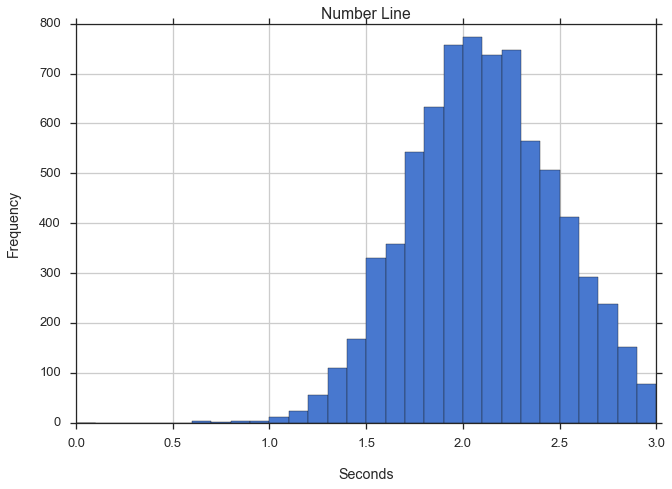

In [48]:
#pd.options.display.mpl_style = 'default'
nline_no_miss['RT'].hist(bins=30, range=[0,3])
plt.ylim([0,800])
plt.title('Number Line')
plt.xlabel('Seconds', labelpad = 18)
plt.ylabel('Frequency', labelpad = 18)

## Missed by position

In [49]:
position_missed.sum()

Task  Line_pct
1     0.03         8
      0.07        15
      0.11        10
      0.21         9
      0.28        10
      0.33        13
      0.36        12
      0.45         5
      0.57         6
      0.60         1
      0.65         1
      0.74         8
      0.77        13
      0.85        10
      0.90         9
      0.98         6
2     0.03        13
      0.07         7
      0.11         6
      0.21        11
      0.28         7
      0.33         4
      0.36         3
      0.45         3
      0.57         3
      0.60         2
      0.65         4
      0.74         9
      0.77         7
      0.85        17
      0.90         6
      0.98        12
3     0.03         7
      0.07        15
      0.11         9
      0.21         5
      0.28         3
      0.33         5
      0.36         6
      0.45         7
      0.57         7
      0.60         7
      0.65         7
      0.74        11
      0.77         4
      0.85         7
      0.90        1

In [50]:
missed_position = position_missed.sum()
pos_miss_1 = missed_position.iloc[0:16]
pos_miss_2 = missed_position.iloc[16:32]
pos_miss_3 = missed_position.iloc[32:48]
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
#len(pos_miss_1)

In [51]:
pal = sns.color_palette()

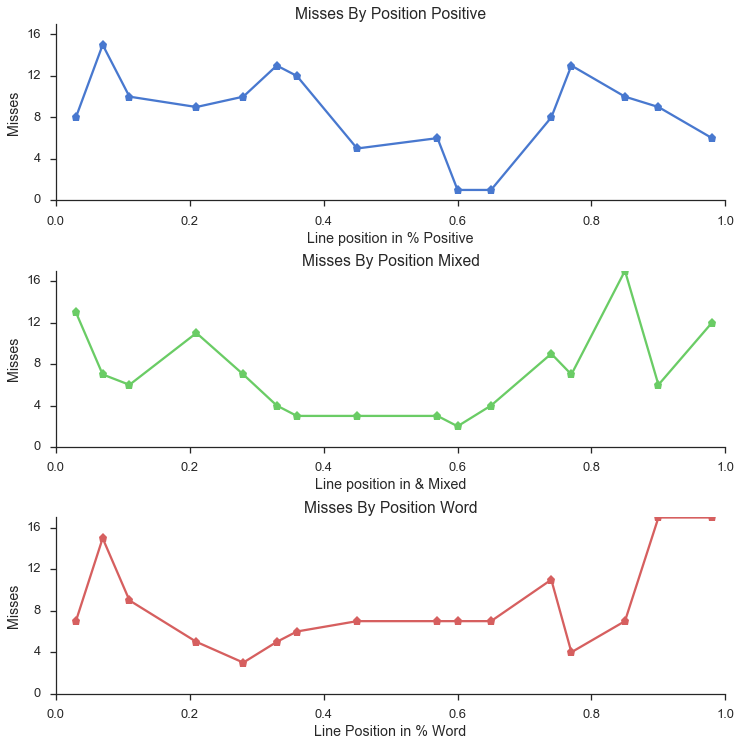

In [52]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, pos_miss_1, color=pal[0], marker='p')
plt.title('Misses By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, pos_miss_2, color=pal[1], marker='p')
plt.title('Misses By Position Mixed')
plt.xlabel('Line position in & Mixed', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, pos_miss_3, color=pal[2], marker='p')
plt.title('Misses By Position Word')
plt.xlabel('Line Position in % Word', labelpad = 4)
plt.ylabel('Misses')
plt.ylim([0,17])
plt.yticks(([0,4,8,12,16]))

plt.subplots_adjust(hspace=.4)
sns.despine()

How many trials did they actually respond?

## RTHold missed analysis

In [53]:
nline_missed['RTHold'].groupby(level=0).mean()

Subject
s_02003    0.580029
s_02004    0.371789
s_02005    0.523442
s_02006    0.318201
s_02007    0.446265
s_02010    0.617966
s_02011    0.586275
s_02012    0.432686
s_02014    0.439934
s_02015    0.620800
s_02016    0.969234
s_02017    0.460634
s_02018    0.409631
s_02019    0.387337
s_02021    0.455508
s_02022    0.981399
s_02023    1.329770
s_02024    0.595365
s_02027    0.886305
s_04101    0.760889
s_04102    1.330117
s_04103    0.575732
s_04105    0.623258
s_04106    0.736115
s_04107    0.550096
s_04108    0.369036
s_04109    1.114158
s_04110    0.602176
s_04111    0.688119
s_04112    0.403312
s_04113    0.728374
s_04114    0.600681
s_04118    0.704647
s_04119    0.773352
s_04120    0.948407
s_04201    1.150705
s_04202    0.518021
s_04203    0.556139
s_04204    1.089988
s_04205    0.591679
s_04206    0.398903
s_04207    0.362602
s_04209    0.394067
s_04210    0.461892
s_04211    0.482860
s_04212    1.264613
s_04213    1.199714
s_04214    0.625229
s_04215    0.734159
s_04216    0

## RT Hold Missed Overall Average

In [54]:
np.mean(nline_missed['RTHold'].groupby(level=0).mean())

0.6836902181279013

In [55]:
responded.loc[:,'RT_Diff'] = responded['RT']-responded['RTHold']

## Averages by subjected for responded trials

In [56]:
responded[['Error', 'RT', 'RTHold', 'RT_Diff', 'AbsError']].groupby(level=0).mean()

Error        RT    RTHold   RT_Diff  AbsError
Subject                                                  
s_02003  0.002544  2.240014  0.480898  1.759116  0.022472
s_02004  0.000621  2.181841  0.390107  1.791734  0.020997
s_02005 -0.004826  2.378822  0.468106  1.910716  0.021902
s_02006 -0.000487  1.970216  0.422093  1.548123  0.026771
s_02007 -0.009034  2.117213  0.430258  1.686955  0.027687
s_02010 -0.003834  1.801020  0.402272  1.398747  0.034298
s_02011  0.005220  2.177101  0.512704  1.664397  0.031181
s_02012  0.015029  2.281063  0.420507  1.860557  0.042743
s_02014  0.000828  2.200079  0.485166  1.714912  0.033909
s_02015 -0.009805  2.150314  0.489373  1.660941  0.036630
s_02016  0.002051  2.068810  0.514982  1.553828  0.027869
s_02017 -0.005217  2.264548  0.352408  1.912139  0.040670
s_02018 -0.001200  1.961148  0.417479  1.543669  0.022804
s_02019 -0.008576  2.280169  0.615011  1.665158  0.025554
s_02021  0.001716  2.048962  0.403868  1.645094  0.018419
s_02022 -0.000880  2.280846  0.522029  1.758817  0.025221
s_02023 -0.007981  2.196848  0.566030  1.630818  0.025385
s_02024 -0.001749  2.250912  0.523561  1.727351  0.028414
s_02027  0.004459  2.161185  0.477401  1.683783  0.021308
s_04101  0.000367  2.126994  0.438679  1.688315  0.014450
s_04102 -0.001154  2.086361  0.562893  1.523468  0.029723
s_04103 -0.005674  2.213000  0.419749  1.793251  0.014655
s_04105 -0.004287  2.187713  0.453583  1.734130  0.018730
s_04106 -0.005307  2.278004  0.464659  1.813344  0.021909
s_04107  0.001220  2.255703  0.419663  1.836041  0.019135
s_04108 -0.005221  1.916144  0.392673  1.523472  0.018594
s_04109 -0.009659  1.953166  0.394496  1.558670  0.029116
s_04110 -0.000969  2.047309  0.440873  1.606436  0.028729
s_04111  0.002461  2.056291  0.459536  1.596756  0.025027
s_04112 -0.003342  2.103643  0.379292  1.724351  0.018053
s_04113  0.005006  2.113399  0.479461  1.633939  0.020232
s_04114 -0.000073  2.162765  0.468522  1.694243  0.021499
s_04115 -0.003848  1.681983  0.341007  1.340976  0.027523
s_04118 -0.001219  2.029640  0.505598  1.524042  0.027642
s_04119  0.000282  2.164869  0.566043  1.598826  0.015229
s_04120 -0.002919  1.967092  0.506782  1.460311  0.022767
s_04201  0.000109  2.112684  0.415970  1.696715  0.020066
s_04202 -0.007061  1.934750  0.404929  1.529822  0.025813
s_04203 -0.002844  2.157114  0.486090  1.671024  0.022175
s_04204  0.000505  2.058401  0.462040  1.596360  0.017634
s_04205 -0.001892  1.702630  0.367640  1.334990  0.025618
s_04206 -0.002355  2.111679  0.442770  1.668909  0.016909
s_04207  0.008149  2.298960  0.351908  1.947052  0.024880
s_04209  0.006372  2.017092  0.395809  1.621284  0.021018
s_04210 -0.005013  2.026506  0.443229  1.583276  0.028602
s_04211 -0.002492  2.047835  0.411585  1.636250  0.018023
s_04212  0.002865  2.140149  0.387630  1.752519  0.017951
s_04213 -0.002518  2.126803  0.572940  1.553863  0.027444
s_04214  0.025790  2.300428  0.543033  1.757395  0.043720
s_04215  0.009148  2.222391  0.470715  1.751676  0.030634
s_04216 -0.002867  2.157417  0.408812  1.748605  0.013300
s_04217 -0.006918  2.066301  0.416229  1.650072  0.018805
s_04218  0.010520  1.838213  0.366438  1.471775  0.028594
s_04219  0.015945  2.080904  0.478462  1.602441  0.031703
s_04220 -0.000619  2.174687  0.381142  1.793545  0.016055

## Overall Averages

In [57]:
np.mean(responded[['Error', 'RT', 'RTHold','RT_Diff','AbsError']].groupby(level=0).mean())

Error      -0.000193
RT          2.107821
RTHold      0.450821
RT_Diff     1.657000
AbsError    0.024658
dtype: float64

In [58]:
responded['BigError'] = 0
responded.loc[responded['AbsError']>0.15,'BigError'] = 1
responded['BigError'].sum()

94

In [59]:
len(responded)

7504

In [60]:
responded = responded[responded['BigError']==0]

In [61]:
responded = responded[pd.notnull(responded['AbsError'])]
len(responded)

7410

## Plots by position

In [62]:
position_tasks = responded.groupby(['Task', 'Line_pct'])

In [63]:
n_subj = len(responded.groupby(level=0))

In [64]:
n_subj

55

In [65]:
position_tasks['RT'].median()

Task  Line_pct
1     0.03        2.130450
      0.07        2.221878
      0.11        2.209069
      0.21        2.217604
      0.28        2.160254
      0.33        2.126479
      0.36        2.211002
      0.45        1.827223
      0.57        1.864907
      0.60        1.909210
      0.65        2.025710
      0.74        2.145107
      0.77        2.246348
      0.85        2.270838
      0.90        2.245090
      0.98        2.159958
2     0.03        2.228118
      0.07        2.278722
      0.11        2.261481
      0.21        2.159954
      0.28        2.171144
      0.33        2.076122
      0.36        2.008768
      0.45        1.798211
      0.57        1.913324
      0.60        1.994663
      0.65        2.043333
      0.74        2.148558
      0.77        2.208522
      0.85        2.225793
      0.90        2.283234
      0.98        2.243249
3     0.03        2.244262
      0.07        2.220787
      0.11        2.222524
      0.21        2.120788
      0.28   

In [66]:
rts = position_tasks['RT'].median()
rts_std = position_tasks['RT'].std()
rts_se = rts_std/np.sqrt(n_subj)

Next code is to calculate standard error by first computing the mean RT for each subject and then taking the std of the subjects.
First I calculate the mean for each subject and each position (3 numbers)

In [67]:
D = {}
for sub in responded.groupby(level=0).groups.keys():
    for pos in position_tasks.groups.keys():
        task = pos[0]
        stim = pos[1]
        if D.get(task,0) == 0:
            D[task] = {}
        if D[task].get(stim,0) == 0:
            D[task][stim] = {'raw':[],'meanRT':[], 'stdRT': [], 'error_raw':[], 'stdError':[],
                             'meanError':[],'sign_error_raw':[], 'sign_error_SD':[],
                             'sign_error_mean':[], 'SD_raw':[],'SD_mean':[],'response_raw':[],
                             'response_mean':[]}
        D[task][stim]['raw'].append(position_tasks.get_group((task,stim)).loc[sub]['RT'].mean())
        D[task][stim]['error_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['AbsError'].mean())
        D[task][stim]['sign_error_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].mean())
        D[task][stim]['SD_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['Error'].std())
        D[task][stim]['response_raw'].append(position_tasks.get_group((task,stim)).loc[sub]['Response'].mean())

Then I take the std deviation between sebjects and also the median between subjects

In [68]:
np.sort(D[task].keys())

array([ 0.03,  0.07,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.9 ,  0.98])

## How many SD missing by task/position (after removing BigError)

In [69]:
nans = []
for task in D:
    print 'task', task
    for stim in np.sort(D[task].keys()):
        nans.append(np.count_nonzero(np.isnan(D[task][stim]['SD_raw'])))
        print stim
        print np.count_nonzero(np.isnan(D[task][stim]['SD_raw']))
print 'sum', np.sum(nans)

task 1.0
0.03
1
0.07
1
0.11
2
0.21
1
0.28
2
0.33
0
0.36
1
0.45
1
0.57
2
0.6
0
0.65
0
0.74
0
0.77
4
0.85
2
0.9
0
0.98
0
task 2.0
0.03
2
0.07
1
0.11
2
0.21
2
0.28
2
0.33
0
0.36
0
0.45
0
0.57
0
0.6
1
0.65
0
0.74
2
0.77
3
0.85
2
0.9
0
0.98
2
task 3.0
0.03
0
0.07
0
0.11
2
0.21
0
0.28
0
0.33
0
0.36
2
0.45
1
0.57
1
0.6
0
0.65
1
0.74
2
0.77
0
0.85
0
0.9
2
0.98
2
sum 49


## How many missing by task/subject

In [70]:
s_miss = np.zeros((n_subj,16,3))
for task in range(0,len(D.keys())):
    print 'task', D.keys()[task]
    TASK = D.keys()[task]
    for stim in range(0,len(np.sort(D[TASK].keys()))):
        STIM = D[TASK].keys()[stim]
        tmp  = np.argwhere(np.isnan(D[TASK][STIM]['SD_raw']))
        s_miss[tmp,stim,task] = s_miss[tmp,stim,task] + 1

task 1.0
task 2.0
task 3.0


### Positive

In [71]:
np.sum(s_miss[:,:,0],1)

array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  5.,  1.,  0.,  1.,  2.,  0.,  0.,  0.,
        0.,  0.,  1.])

### Mixed

In [72]:
np.sum(s_miss[:,:,1],1)

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  2.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,
        1.,  0.,  0.,  1.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.])

### Word

In [73]:
np.sum(s_miss[:,:,2],1)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  3.,  1.,  0.,  0.,  0.,  0.,  0.,  3.,
        0.,  0.,  1.])

## How many trial missed by subject (across tasks)

In [74]:
np.sum(np.sum(s_miss[:,:,:],2),1)

array([  1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   2.,   1.,   1.,   0.,   1.,   0.,   0.,   1.,
         0.,   0.,   1.,   0.,   0.,   0.,   1.,   2.,   1.,   1.,   1.,
         0.,   0.,   2.,   2.,   1.,   1.,   2.,   0.,   0.,   1.,   0.,
        10.,   3.,   1.,   1.,   2.,   0.,   1.,   4.,   0.,   0.,   2.])

In [75]:
responded.groupby(level=0).groups.keys()

['s_04203',
 's_04202',
 's_04201',
 's_04207',
 's_04206',
 's_04205',
 's_04204',
 's_02003',
 's_04209',
 's_02007',
 's_02006',
 's_02005',
 's_02004',
 's_04119',
 's_04118',
 's_04113',
 's_04112',
 's_04111',
 's_04110',
 's_04115',
 's_04114',
 's_04103',
 's_04216',
 's_02018',
 's_02010',
 's_02011',
 's_04210',
 's_04211',
 's_04120',
 's_04213',
 's_04212',
 's_04215',
 's_02019',
 's_04217',
 's_04218',
 's_04219',
 's_02012',
 's_02014',
 's_02015',
 's_02016',
 's_04220',
 's_04108',
 's_04109',
 's_04101',
 's_04102',
 's_02017',
 's_04105',
 's_04106',
 's_04107',
 's_02024',
 's_02027',
 's_04214',
 's_02021',
 's_02023',
 's_02022']

## Extract relevant data for calculations

In [76]:
for task in D:
    #print task
    for stim in np.sort(D[task].keys()):
        D[task][stim]['stdRT'] = np.nanstd(D[task][stim]['raw'])
        D[task][stim]['meanRT'] = np.nanmean(D[task][stim]['raw'])
        D[task][stim]['stdError'] = np.nanstd(D[task][stim]['error_raw'])
        D[task][stim]['meanError'] = np.nanmean(D[task][stim]['error_raw'])
        D[task][stim]['sign_error_SD'] = np.nanstd(D[task][stim]['sign_error_raw'])
        D[task][stim]['sign_error_mean'] = np.nanmean(D[task][stim]['sign_error_raw'])
        D[task][stim]['SD_mean'] = np.nanmean(D[task][stim]['SD_raw'])
        D[task][stim]['SD_error'] = np.nanstd(D[task][stim]['SD_raw'])
        D[task][stim]['response_mean'] = np.nanmean(D[task][stim]['response_raw'])

In [77]:
D[1.0][0.03]['meanRT']

2.1430857548747908

In [78]:
rts_1 = []
rts_2 = []
rts_3 = []
for stim in np.sort(D[1].keys()):
    rts_1.append(D[1][stim]['meanRT'])
for stim in np.sort(D[2].keys()):
    rts_2.append(D[2][stim]['meanRT'])
for stim in np.sort(D[3].keys()):
    rts_3.append(D[3][stim]['meanRT'])

In [79]:
rts_std_1 = []
rts_std_2 = []
rts_std_3 = []
for stim in np.sort(D[1].keys()):
    rts_std_1.append(D[1][stim]['stdRT'])
for stim in np.sort(D[2].keys()):
    rts_std_2.append(D[2][stim]['stdRT'])
for stim in np.sort(D[3].keys()):
    rts_std_3.append(D[3][stim]['stdRT'])

In [80]:
rts_se_1 = rts_std_1/np.sqrt(n_subj)
rts_se_2 = rts_std_2/np.sqrt(n_subj)
rts_se_3 = rts_std_3/np.sqrt(n_subj)

In [81]:
rts_1_med = rts.iloc[0:16]
rts_2_med = rts.iloc[16:32]
rts_3_med = rts.iloc[32:48]

rts_1 is median across subjects after averaging together instances of same stimuli within subject

In [82]:
rts_1

[2.1430857548747908,
 2.2615604563661225,
 2.2480836527936434,
 2.218074019681517,
 2.1783621611620041,
 2.1523295194406544,
 2.1913957105856974,
 1.8042088229064961,
 1.9149926600836285,
 1.9226694752255589,
 2.0317648872371854,
 2.1503798690567888,
 2.2189284821884936,
 2.29620419014147,
 2.2654720232306031,
 2.1720108195589951]

rts_med is median of all trials within a task without taking into account within subject differences

In [83]:
rts_1_med

Task  Line_pct
1     0.03        2.130450
      0.07        2.221878
      0.11        2.209069
      0.21        2.217604
      0.28        2.160254
      0.33        2.126479
      0.36        2.211002
      0.45        1.827223
      0.57        1.864907
      0.60        1.909210
      0.65        2.025710
      0.74        2.145107
      0.77        2.246348
      0.85        2.270838
      0.90        2.245090
      0.98        2.159958
Name: RT, dtype: float64

In [84]:
xvals = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.770, 0.850, 0.900, 0.980])
len(rts_1)
xvals1 = np.array([0.030, 0.070, 0.110, 0.210, 0.280, 0.330, 0.360, 0.450, 0.570, 0.600, 0.650, 0.740, 0.900, 0.980])

## Overall Median

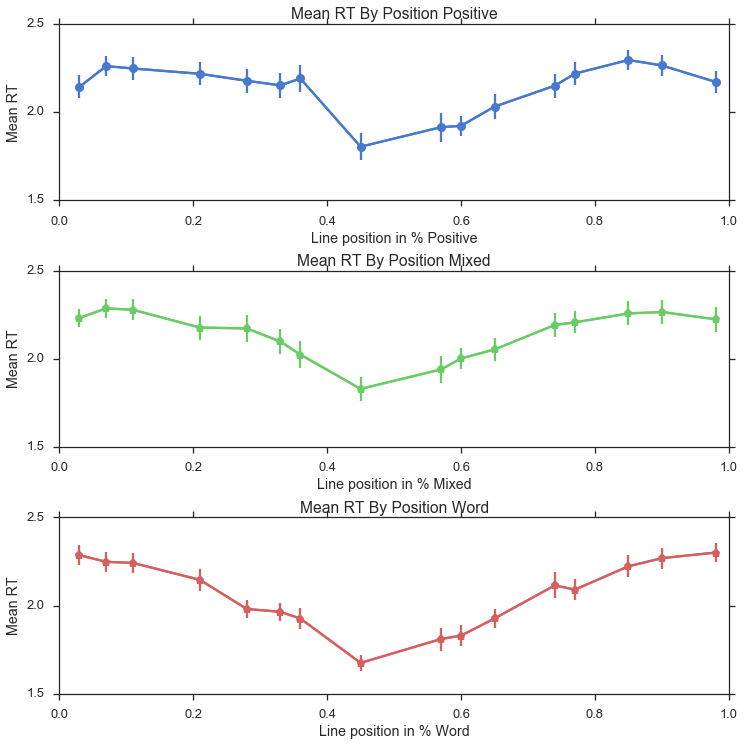

In [85]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, rts_1, 'o-', color=pal[0])
fig1.errorbar(xvals, rts_1, yerr=rts_se_1*1.96)
plt.title('Mean RT By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, rts_2, color=pal[1], marker='p')
fig2.errorbar(xvals, rts_2, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, rts_3, color=pal[2], marker='p')
fig3.errorbar(xvals, rts_3, yerr=rts_se_3*1.96, color=pal[2])
plt.title('Mean RT By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

plt.subplots_adjust(hspace=.4)

In [86]:
rts_1corr = [rts_1[i] - rts_3[i] for i in range(0,len(rts_1))]
rts_2corr = [rts_2[i] - rts_3[i] for i in range(0,len(rts_2))]

([<matplotlib.axis.YTick at 0x12159b410>,
 <a list of 5 Text yticklabel objects>)

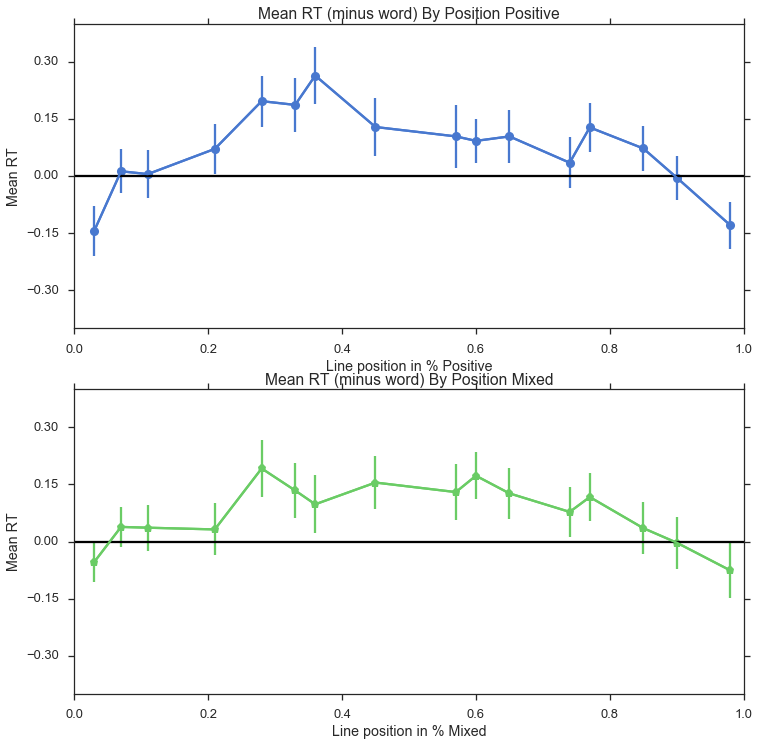

In [87]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(2,1,1)
fig1.plot(xvals, rts_1corr, 'o-', color=pal[0])
fig1.plot([0,1], [0,0], color='black', linestyle='-')
fig1.errorbar(xvals, rts_1corr, yerr=rts_se_1*1.96)
plt.title('Mean RT (minus word) By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.40,0.40])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

fig2 = plt.subplot(2,1,2)
fig2.plot(xvals, rts_2corr, color=pal[1], marker='p')
fig2.plot([0,1], [0,0], color='black', linestyle='-')
fig2.errorbar(xvals, rts_2corr, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT (minus word) By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.40,0.40])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

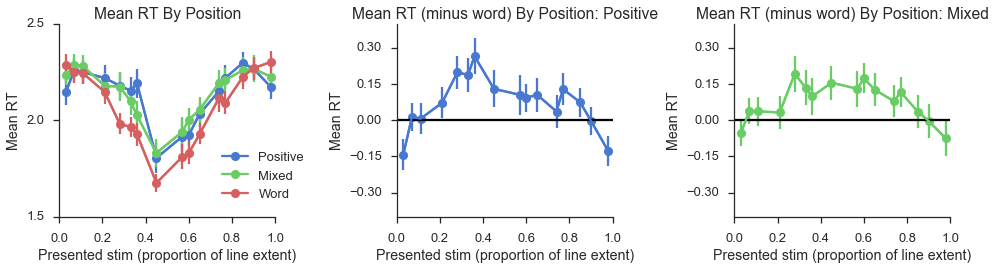

In [293]:
fig = plt.figure(figsize=(14,4))
fig1 = plt.subplot(1,3,1)
fig1.plot(xvals, rts_1, color=pal[0], marker='o')
fig1.errorbar(xvals, rts_1, yerr=rts_se_1*1.96)
fig1.plot(xvals, rts_2, color=pal[1], marker='o')
fig1.errorbar(xvals, rts_2, yerr=rts_se_2*1.96, color=pal[1])
fig1.plot(xvals, rts_3, color=pal[2], marker='o')
fig1.errorbar(xvals, rts_3, yerr=rts_se_3*1.96, color=pal[2])
fig1.legend(['Positive','Mixed','Word'],loc='best',bbox_to_anchor=[0.7,0.4])
plt.title('Mean RT By Position')
plt.xlabel('Presented stim (proportion of line extent)', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([1.5,2.5])
plt.yticks(([1.5,2,2.5]))

fig2 = plt.subplot(1,3,2)
fig2.plot(xvals, rts_1corr, 'o-', color=pal[0])
fig2.plot([0,1], [0,0], color='black', linestyle='-')
fig2.errorbar(xvals, rts_1corr, yerr=rts_se_1*1.96)
plt.title('Mean RT (minus word) By Position: Positive')
plt.xlabel('Presented stim (proportion of line extent)', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.40,0.40])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

fig3 = plt.subplot(1,3,3)
fig3.plot(xvals, rts_2corr, color=pal[1], marker='o')
fig3.plot([0,1], [0,0], color='black', linestyle='-')
fig3.errorbar(xvals, rts_2corr, yerr=rts_se_2*1.96, color=pal[1])
plt.title('Mean RT (minus word) By Position: Mixed')
plt.xlabel('Presented stim (proportion of line extent)', labelpad = 4)
plt.ylabel('Mean RT')
plt.ylim([-0.40,0.40])
plt.yticks(([-0.3,-0.15,0,0.15,0.3]))

#plt.subplots_adjust(hspace=.4)
sns.despine()
plt.tight_layout()
plt.savefig('MeanRT_Combined.pdf',dpi=300)

## Error  plots

In [89]:
error = position_tasks['AbsError'].median()
error_std = position_tasks['AbsError'].std()
error_se = error_std/np.sqrt(n_subj)

In [90]:
error_1_med = error.iloc[0:16]
error_2_med = error.iloc[16:32]
error_3_med = error.iloc[32:48]
error_se_1 = error_se.iloc[0:16]
error_se_2 = error_se.iloc[16:32]
error_se_3 = error_se.iloc[32:48]

In [91]:
len(D[1].keys())

16

In [92]:
error_1 = []
error_2 = []
error_3 = []
for stim in np.sort(D[1].keys()):
    error_1 .append(D[1][stim]['meanError'])
for stim in np.sort(D[2].keys()):
    error_2 .append(D[2][stim]['meanError'])
for stim in np.sort(D[3].keys()):
    error_3.append(D[3][stim]['meanError'])

In [93]:
error_1

[0.017386787053218552,
 0.023745365750069646,
 0.029147444603933134,
 0.03439384488209097,
 0.035860616778956252,
 0.039354213403651576,
 0.0494475399025468,
 0.02057130183711716,
 0.02260193655885482,
 0.020706894123284646,
 0.032847631921623474,
 0.026984775871818564,
 0.029199586944160166,
 0.030482789711236975,
 0.02505457064859333,
 0.013669782267529067]

In [94]:
error_1_med = error_1_med.get_values()
error_2_med = error_2_med.get_values()
error_3_med = error_3_med.get_values()

In [95]:
error_1_med

array([ 0.01405286,  0.02030837,  0.02519849,  0.02947188,  0.03110132,
        0.0293379 ,  0.04169472,  0.0160793 ,  0.01598799,  0.01739179,
        0.02775328,  0.02084737,  0.02150327,  0.02092106,  0.01894268,
        0.00990012])

In [96]:
error_std_1 = []
error_std_2 = []
error_std_3 = []
for stim in np.sort(D[1].keys()):
    error_std_1.append(D[1][stim]['stdError'])
for stim in np.sort(D[2].keys()):
    error_std_2.append(D[2][stim]['stdError'])
for stim in np.sort(D[3].keys()):
    error_std_3.append(D[3][stim]['stdError'])

In [97]:
error_se1 = error_std_1/np.sqrt(n_subj)
error_se2 = error_std_2/np.sqrt(n_subj)
error_se3 = error_std_3/np.sqrt(n_subj)

## MAE by position

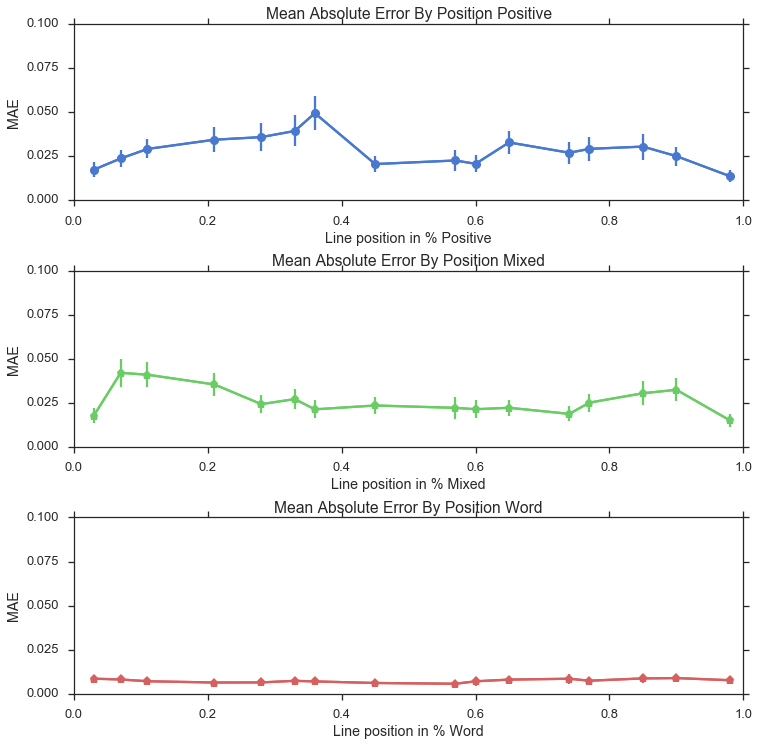

In [98]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, error_1, 'o-', color=pal[0])
fig1.errorbar(xvals, error_1, yerr=error_se_1*1.96, color=pal[0])
plt.title('Mean Absolute Error By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, error_2, color=pal[1], marker='p')
fig2.errorbar(xvals, error_2, yerr=error_se_2*1.96, color=pal[1])
plt.title('Mean Absolute Error By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, error_3, color=pal[2], marker='p')
fig3.errorbar(xvals, error_3, yerr=error_se_3*1.96, color=pal[2])
plt.title('Mean Absolute Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.1])
plt.yticks(([0.0,0.025,0.05,0.075,0.1]))

plt.subplots_adjust(hspace=.4)

## Signed error is calculated as Response - Correct

In [99]:
signerror_1 = []
signerror_2 = []
signerror_3 = []
for stim in np.sort(D[1].keys()):
    signerror_1.append(D[1][stim]['sign_error_mean'])
for stim in np.sort(D[2].keys()):
    signerror_2.append(D[2][stim]['sign_error_mean'])
for stim in np.sort(D[3].keys()):
    signerror_3.append(D[3][stim]['sign_error_mean'])

In [100]:
SD_signerror_1 = []
SD_signerror_2 = []
SD_signerror_3 = []
for stim in np.sort(D[1].keys()):
    SD_signerror_1.append(D[1][stim]['sign_error_SD'])
for stim in np.sort(D[2].keys()):
    SD_signerror_2.append(D[2][stim]['sign_error_SD'])
for stim in np.sort(D[3].keys()):
    SD_signerror_3.append(D[3][stim]['sign_error_SD'])

In [101]:
SE_signerror_1 = SD_signerror_1/np.sqrt(n_subj)
SE_signerror_2 = SD_signerror_2/np.sqrt(n_subj)
SE_signerror_3 = SD_signerror_3/np.sqrt(n_subj)

In [102]:
SD_1 = []
SD_2 = []
SD_3 = []
for stim in np.sort(D[1].keys()):
    SD_1.append(D[1][stim]['SD_mean'])
for stim in np.sort(D[2].keys()):
    SD_2.append(D[2][stim]['SD_mean'])
for stim in np.sort(D[3].keys()):
    SD_3.append(D[3][stim]['SD_mean'])

In [103]:
SD_1_error = []
SD_2_error = []
SD_3_error = []
for stim in np.sort(D[1].keys()):
    SD_1_error.append(D[1][stim]['SD_error'])
for stim in np.sort(D[2].keys()):
    SD_2_error.append(D[2][stim]['SD_error'])
for stim in np.sort(D[3].keys()):
    SD_3_error.append(D[3][stim]['SD_error'])

In [104]:
SD_1_error = SD_1_error/np.sqrt(n_subj)
SD_2_error = SD_2_error/np.sqrt(n_subj)
SD_3_error = SD_3_error/np.sqrt(n_subj)

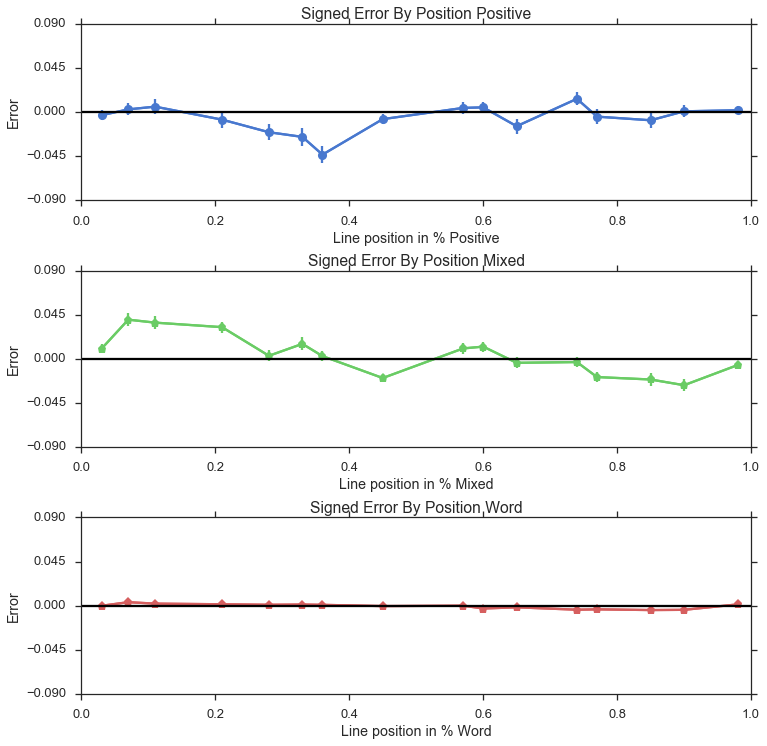

In [105]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, signerror_1, 'o-', color=pal[0])
fig1.errorbar(xvals, signerror_1, yerr=SE_signerror_1*1.96, color=pal[0])
fig1.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, signerror_2, color=pal[1], marker='p')
fig2.errorbar(xvals, signerror_2, yerr=SE_signerror_2*1.96, color=pal[1])
fig2.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, signerror_3, color=pal[2], marker='p')
fig3.errorbar(xvals, signerror_3, yerr=SE_signerror_3*1.96, color=pal[2])
fig3.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Signed Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('Error')
plt.ylim([-0.09,0.09])
plt.yticks(([-0.09,-0.045,0,0.045,0.09]))

plt.subplots_adjust(hspace=.4)

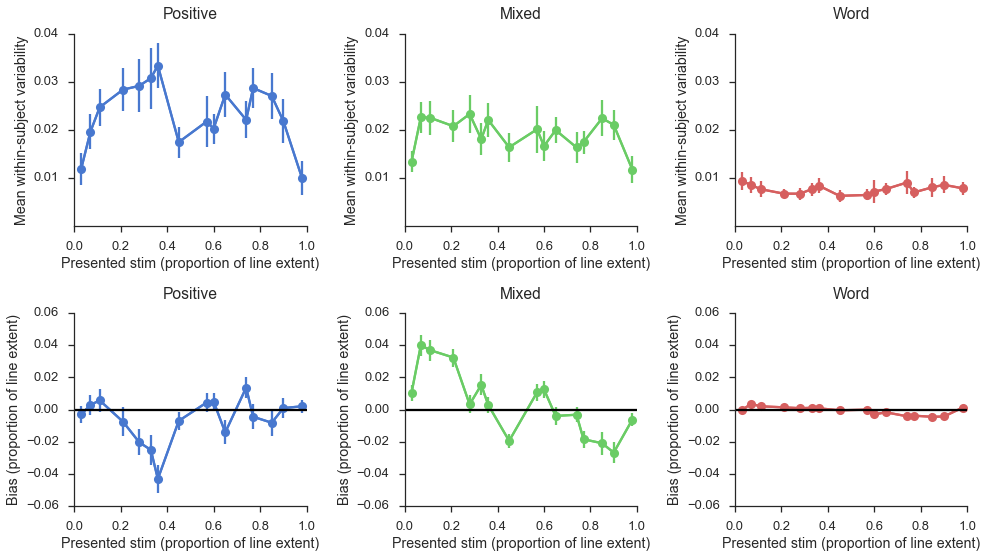

In [298]:
fig = plt.figure(figsize=(14,8))
fig1 = plt.subplot(2,3,1)
fig1.plot(xvals, SD_1, color=pal[0], marker='o')
fig1.errorbar(xvals, SD_1, yerr=SD_1_error*1.96, color=pal[0])
plt.title('Positive',y=1.05)
plt.xlabel('Presented stim (proportion of line extent)', labelpad = 4)
plt.ylabel('Mean within-subject variability')
plt.ylim([0,0.04])
plt.yticks(([0.01,0.02,0.03,0.04]))

fig2 = plt.subplot(2,3,2)
fig2.plot(xvals, SD_2, color=pal[1], marker='o')
fig2.errorbar(xvals, SD_2, yerr=SD_2_error*1.96, color=pal[1])
plt.title('Mixed',y=1.05)
plt.xlabel('Presented stim (proportion of line extent)', labelpad = 4)
plt.ylabel('Mean within-subject variability')
plt.ylim([0,0.04])
plt.yticks(([0.01,0.02,0.03,0.04]))

fig3 = plt.subplot(2,3,3)
fig3.plot(xvals, SD_3, color=pal[2], marker='o')
fig3.errorbar(xvals, SD_3, yerr=SD_3_error*1.96, color=pal[2])
plt.title('Word',y=1.05)
plt.xlabel('Presented stim (proportion of line extent)', labelpad = 4)
plt.ylabel('Mean within-subject variability')
plt.ylim([0,0.04])
plt.yticks(([0.01,0.02,0.03,0.04]))

fig4 = plt.subplot(2,3,4)
fig4.plot(xvals, signerror_1, color=pal[0], marker='o')
fig4.errorbar(xvals, signerror_1, yerr=SE_signerror_1*1.96, color=pal[0])
fig4.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Positive',y=1.05)
plt.xlabel('Presented stim (proportion of line extent)', labelpad = 4)
plt.ylabel('Bias (proportion of line extent)')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.06,-0.04,-0.02,0,0.02,0.04,0.06]))

fig5 = plt.subplot(2,3,5)
fig5.plot(xvals, signerror_2, color=pal[1], marker='o')
fig5.errorbar(xvals, signerror_2, yerr=SE_signerror_2*1.96, color=pal[1])
fig5.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Mixed',y=1.05)
plt.xlabel('Presented stim (proportion of line extent)', labelpad = 4)
plt.ylabel('Bias (proportion of line extent)')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.06,-0.04,-0.02,0,0.02,0.04,0.06]))

fig6 = plt.subplot(2,3,6)
fig6.plot(xvals, signerror_3, color=pal[2], marker='o')
fig6.errorbar(xvals, signerror_3, yerr=SE_signerror_3*1.96, color=pal[2])
fig6.plot([0,1], [0,0], color='black', linestyle='-')
plt.title('Word',y=1.05)
plt.xlabel('Presented stim (proportion of line extent)', labelpad = 4)
plt.ylabel('Bias (proportion of line extent)')
plt.ylim([-0.06,0.06])
plt.yticks(([-0.06,-0.04,-0.02,0,0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)
sns.despine()
plt.tight_layout()
plt.savefig('Bias_Variance_Combined.pdf',dpi=300)

## Adjust x-axis to median estimates

In [107]:
D.keys()

[1.0, 2.0, 3.0]

In [108]:
means_1 = []
means_2 = []
means_3 = []
for stim in np.sort(D[1].keys()):
    means_1.append(D[1][stim]['response_mean'])
for stim in np.sort(D[2].keys()):
    means_2.append(D[2][stim]['response_mean'])
for stim in np.sort(D[3].keys()):
    means_3.append(D[3][stim]['response_mean'])

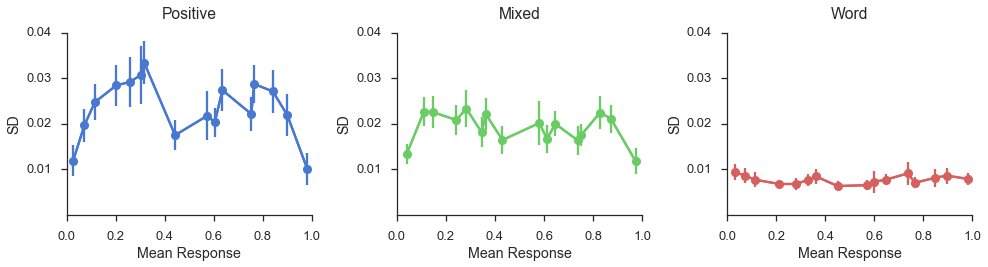

In [109]:
fig = plt.figure(figsize=(14,4))
fig1 = plt.subplot(1,3,1)
fig1.plot(means_1, SD_1, color=pal[0], marker='o')
fig1.errorbar(means_1, SD_1, yerr=SD_1_error*1.96, color=pal[0])
plt.title('Positive',y=1.05)
plt.xlabel('Mean Response', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.04])
plt.yticks(([0.01,0.02,0.03,0.04]))

fig2 = plt.subplot(1,3,2)
fig2.plot(means_2, SD_2, color=pal[1], marker='o')
fig2.errorbar(means_2, SD_2, yerr=SD_2_error*1.96, color=pal[1])
plt.title('Mixed',y=1.05)
plt.xlabel('Mean Response', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.04])
plt.yticks(([0.01,0.02,0.03,0.04]))

fig3 = plt.subplot(1,3,3)
fig3.plot(means_3, SD_3, color=pal[2], marker='o')
fig3.errorbar(means_3, SD_3, yerr=SD_3_error*1.96, color=pal[2])
plt.title('Word',y=1.05)
plt.xlabel('Mean Response', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.04])
plt.yticks(([0.01,0.02,0.03,0.04]))

sns.despine()
plt.tight_layout()
plt.savefig('Variance_Combined_MeanAdjusted.pdf',dpi=300)

## SD calculated as std of each subject and then averaging the individual std

###Only 3 datapoints per position per subject so estimate will have a lot of varriability

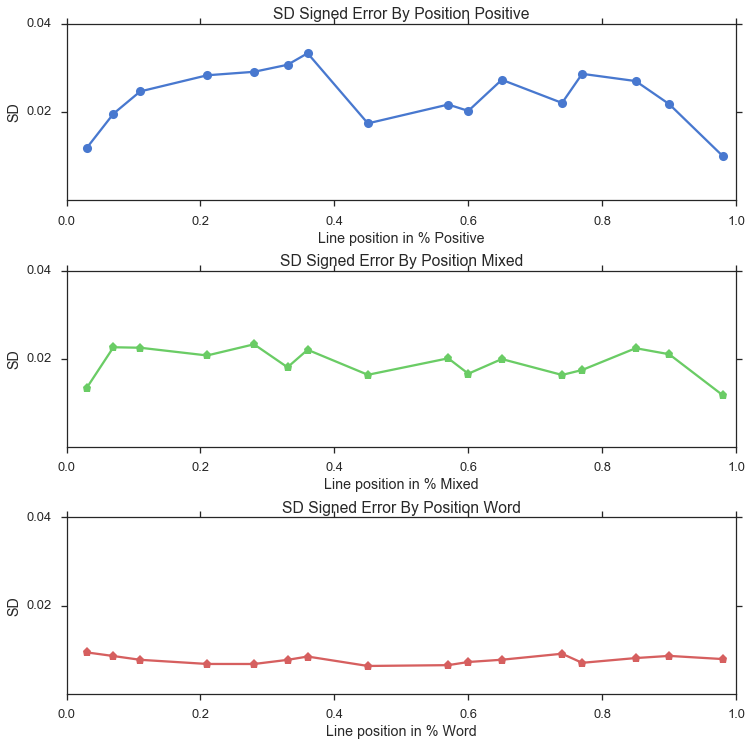

In [110]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, SD_1, 'o-', color=pal[0])
plt.title('SD Signed Error By Position Positive')
plt.xlabel('Line position in % Positive', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.04])
plt.yticks(([0.02,0.04]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, SD_2, color=pal[1], marker='p')
plt.title('SD Signed Error By Position Mixed')
plt.xlabel('Line position in % Mixed', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.04])
plt.yticks(([0.02,0.04]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, SD_3, color=pal[2], marker='p')
plt.title('SD Signed Error By Position Word')
plt.xlabel('Line position in % Word', labelpad = 4)
plt.ylabel('SD')
plt.ylim([0,0.04])
plt.yticks(([0.02,0.04]))

plt.subplots_adjust(hspace=.4)

## Correlate PAE Vs Landmark Distance

## Correlate PAE Vs Landmark Distance

In [111]:
means_1 = np.asarray(means_1)
means_2 = np.asarray(means_2)
means_3 = np.asarray(means_3)

In [112]:
dist_0 = xvals
dist_0

array([ 0.03,  0.07,  0.11,  0.21,  0.28,  0.33,  0.36,  0.45,  0.57,
        0.6 ,  0.65,  0.74,  0.77,  0.85,  0.9 ,  0.98])

In [113]:
dist_0_means_1 = means_1
dist_0_means_2 = means_2
dist_0_means_3 = means_3
dist_0_means_2

array([ 0.04036809,  0.11008393,  0.147046  ,  0.24242686,  0.2831916 ,
        0.34534957,  0.36284926,  0.43045551,  0.58067449,  0.61255672,
        0.64599473,  0.73675894,  0.75145194,  0.82895983,  0.87312396,
        0.97368596])

### Distance from 50

In [114]:
dist_50 = abs(xvals-0.5)
dist_50

array([ 0.47,  0.43,  0.39,  0.29,  0.22,  0.17,  0.14,  0.05,  0.07,
        0.1 ,  0.15,  0.24,  0.27,  0.35,  0.4 ,  0.48])

In [115]:
dist_50_means_1 = abs(means_1-0.5)
dist_50_means_2 = abs(means_2-0.5)
dist_50_means_3 = abs(means_3-0.5)
dist_50_means_2

array([ 0.45963191,  0.38991607,  0.352954  ,  0.25757314,  0.2168084 ,
        0.15465043,  0.13715074,  0.06954449,  0.08067449,  0.11255672,
        0.14599473,  0.23675894,  0.25145194,  0.32895983,  0.37312396,
        0.47368596])

### Distance from 100

In [116]:
dist_100 = abs(xvals - 1)
dist_100

array([ 0.97,  0.93,  0.89,  0.79,  0.72,  0.67,  0.64,  0.55,  0.43,
        0.4 ,  0.35,  0.26,  0.23,  0.15,  0.1 ,  0.02])

In [117]:
dist_100_means_1 = abs(means_1 - 1)
dist_100_means_2 = abs(means_2 - 1)
dist_100_means_3 = abs(means_3 - 1)
dist_100_means_2

array([ 0.95963191,  0.88991607,  0.852954  ,  0.75757314,  0.7168084 ,
        0.65465043,  0.63715074,  0.56954449,  0.41932551,  0.38744328,
        0.35400527,  0.26324106,  0.24854806,  0.17104017,  0.12687604,
        0.02631404])

### Distance from Landmark

In [118]:
dist_Land = pd.DataFrame([dist_0, dist_50, dist_100]).min()
dist_Land

0     0.03
1     0.07
2     0.11
3     0.21
4     0.22
5     0.17
6     0.14
7     0.05
8     0.07
9     0.10
10    0.15
11    0.24
12    0.23
13    0.15
14    0.10
15    0.02
dtype: float64

In [119]:
dist_Land_means_1 = pd.DataFrame([dist_0_means_1, dist_50_means_1, dist_100_means_1]).min()
dist_Land_means_2 = pd.DataFrame([dist_0_means_2, dist_50_means_2, dist_100_means_2]).min()
dist_Land_means_3 = pd.DataFrame([dist_0_means_3, dist_50_means_3, dist_100_means_3]).min()
dist_Land_means_2

0     0.040368
1     0.110084
2     0.147046
3     0.242427
4     0.216808
5     0.154650
6     0.137151
7     0.069544
8     0.080674
9     0.112557
10    0.145995
11    0.236759
12    0.248548
13    0.171040
14    0.126876
15    0.026314
dtype: float64

## PAE vs Landmark Distane (across subjects)

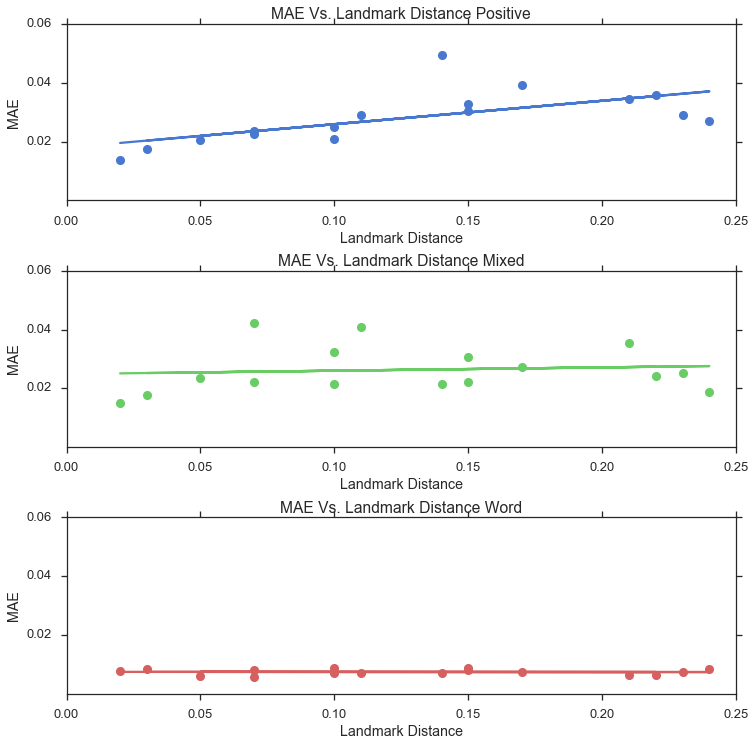

In [120]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land,error_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, error_1, 'o', color=pal[0])
plt.plot(dist_Land, m1*dist_Land + b1, '-', color=pal[0])
plt.title('MAE Vs. Landmark Distance Positive')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m2, b2 = np.polyfit(dist_Land,error_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, error_2, 'o', color=pal[1])
plt.plot(dist_Land, m2*dist_Land + b2, '-', color=pal[1])
plt.title('MAE Vs. Landmark Distance Mixed')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

m3, b3 = np.polyfit(dist_Land,error_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, error_3, 'o', color=pal[2])
plt.plot(dist_Land, m3*dist_Land + b3, '-', color=pal[2])
plt.title('MAE Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('MAE')
plt.ylim([0,0.06])
plt.yticks(([0.02,0.04,0.06]))

plt.subplots_adjust(hspace=.4)

### Slope+,  Slope-,  Slopew

In [121]:
print m1, m2, m3

0.0797938094986 0.0112818831117 -0.000285380446963


In [122]:
from scipy.stats import linregress
slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,error_1)
slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land,error_2)
slope3, intercept3, r3, p3, stderr3 = linregress(dist_Land,error_3)

### r +,  r -,  r w

In [123]:
print 'r1', r1
print 'r2', r2
print 'r3', r3

r1 0.637333280256
r2 0.101337710457
r3 -0.0208228467645


### r^2 +,  r^2 -,  r^2 w

In [124]:
print 'r1sq', r1*r1
print 'r2sq', r2*r2
print 'r3sq', r3*r3

r1sq 0.406193710122
r2sq 0.0102693315607
r3sq 0.000433590947379


### p +,  p -,  p w

In [125]:
print 'p1', p1
print 'p2', p2
print 'p3', p3

p1 0.00791643463312
p2 0.708825956765
p3 0.938987482101


## Landmark Distance Vs. SD Error

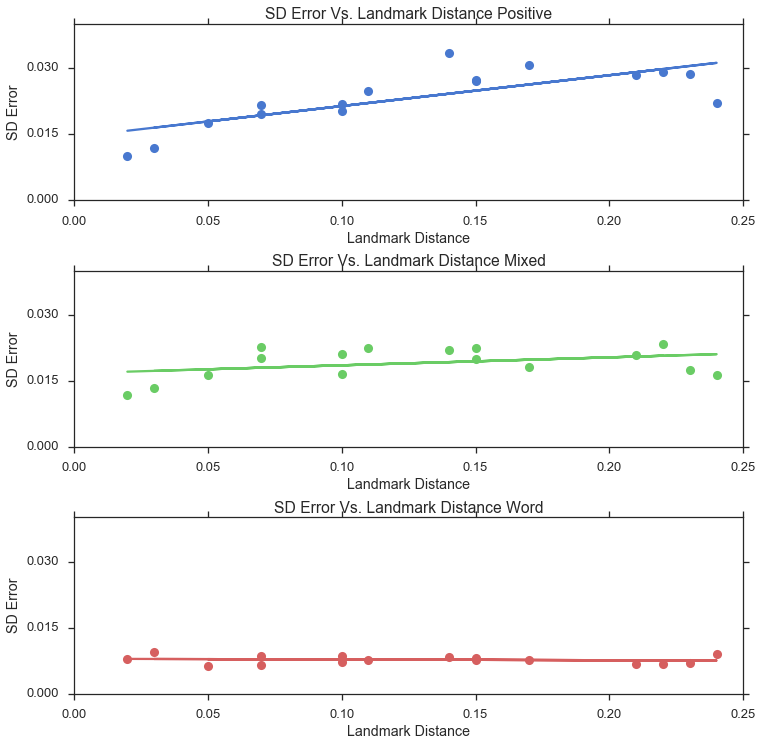

In [126]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land,SD_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land, SD_1, 'o', color=pal[0])
plt.plot(dist_Land, m1*dist_Land + b1, '-', color=pal[0])
plt.title('SD Error Vs. Landmark Distance Positive')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('SD Error')
plt.ylim([0,0.04])
plt.yticks(([0.,0.015,0.03]))

m2, b2 = np.polyfit(dist_Land,SD_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land, SD_2, 'o', color=pal[1])
plt.plot(dist_Land, m2*dist_Land + b2, '-', color=pal[1])
plt.title('SD Error Vs. Landmark Distance Mixed')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('SD Error')
plt.ylim([0,0.04])
plt.yticks(([0.,0.015,0.03]))

m3, b3 = np.polyfit(dist_Land,SD_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land, SD_3, 'o', color=pal[2])
plt.plot(dist_Land, m3*dist_Land + b3, '-', color=pal[2])
plt.title('SD Error Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('SD Error')
plt.ylim([0,0.04])
plt.yticks(([0.,0.015,0.03]))

plt.subplots_adjust(hspace=.4)

In [127]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [128]:
slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,SD_1)
slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land,SD_2)
slope3, intercept3, r3, p3, stderr3 = linregress(dist_Land,SD_3)

In [129]:
print r1,r2,r3

0.762845059825 0.371830979879 -0.12828576401


In [130]:
print p1,p2,p3

0.000588225467436 0.156153209101 0.635868881954


### Adjusted mean for mixed task

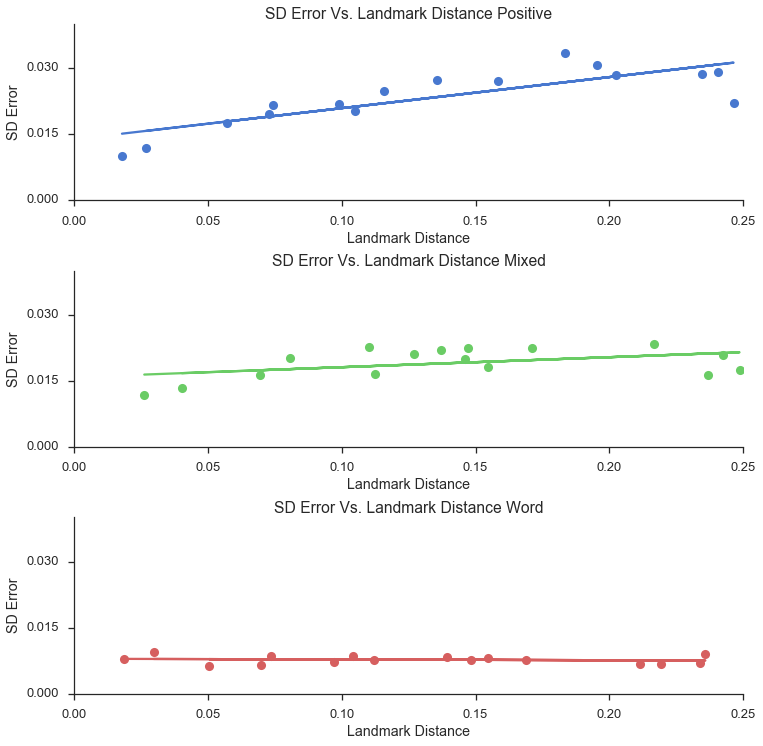

In [131]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(dist_Land_means_1,SD_1,1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(dist_Land_means_1, SD_1, 'o', color=pal[0])
plt.plot(dist_Land_means_1, m1*dist_Land_means_1 + b1, '-', color=pal[0])
plt.title('SD Error Vs. Landmark Distance Positive')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('SD Error')
plt.ylim([0,0.04])
plt.yticks(([0.,0.015,0.03]))

m2, b2 = np.polyfit(dist_Land_means_2,SD_2,1)
fig2 = plt.subplot(3,1,2)
fig2.plot(dist_Land_means_2, SD_2, 'o', color=pal[1])
plt.plot(dist_Land_means_2, m2*dist_Land_means_2 + b2, '-', color=pal[1])
plt.title('SD Error Vs. Landmark Distance Mixed')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('SD Error')
plt.ylim([0,0.04])
plt.yticks(([0.,0.015,0.03]))

m3, b3 = np.polyfit(dist_Land_means_3,SD_3,1)
fig3 = plt.subplot(3,1,3)
fig3.plot(dist_Land_means_3, SD_3, 'o', color=pal[2])
plt.plot(dist_Land_means_3, m3*dist_Land_means_3 + b3, '-', color=pal[2])
plt.title('SD Error Vs. Landmark Distance Word')
plt.xlabel('Landmark Distance', labelpad = 4)
plt.ylabel('SD Error')
plt.ylim([0,0.04])
plt.yticks(([0.,0.015,0.03]))

plt.subplots_adjust(hspace=.4)
sns.despine()

In [132]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [133]:
slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land_means_1,SD_1)
slope2, intercept2, r2, p2, stderr2 = linregress(dist_Land_means_2,SD_2)
slope3, intercept3, r3, p3, stderr3 = linregress(dist_Land_means_3,SD_3)

In [134]:
print r1,r2,r3

0.81312131609 0.452226501713 -0.129193194338


In [135]:
print p1,p2,p3

0.000128183089999 0.0786285475411 0.633461644016


## Estimation slope vs SAT scores

In [136]:
nline_df.to_csv('nline_data_combined.csv', sep='\t')

### Save and open to create 'well formed' dataframe

In [137]:
new_df = pd.read_csv('nline_data_combined.csv',sep='\t')

In [138]:
len(new_df)

10560

In [139]:
new_df.loc[:,:]= new_df[new_df['catch']<1]
#len(nline_miss)
new_df['Missed'] = new_df['Error']
new_df.loc[new_df['Missed']<1,'Missed'] = 0
#Pick only responded trials
new_df.loc[:,:] = new_df[new_df['Missed']==0]

In [140]:
new_df = new_df[pd.notnull(new_df['Subject'])]

In [141]:
new_df['AbsError'] = np.abs(new_df['Error'])

In [142]:
new_df['BigError'] = 0
new_df.loc[new_df['AbsError']>0.15,'BigError'] = 1
new_df['BigError'].sum()

94

In [143]:
new_df.loc[:,:] = new_df.loc[new_df['BigError']==0,:]

In [144]:
new_df= new_df[pd.notnull(new_df['Subject'])]
len(new_df)

7410

In [145]:
np.sort(new_df['Subject'].unique())

array(['s_02003', 's_02004', 's_02005', 's_02006', 's_02007', 's_02010',
       's_02011', 's_02012', 's_02014', 's_02015', 's_02016', 's_02017',
       's_02018', 's_02019', 's_02021', 's_02022', 's_02023', 's_02024',
       's_02027', 's_04101', 's_04102', 's_04103', 's_04105', 's_04106',
       's_04107', 's_04108', 's_04109', 's_04110', 's_04111', 's_04112',
       's_04113', 's_04114', 's_04115', 's_04118', 's_04119', 's_04120',
       's_04201', 's_04202', 's_04203', 's_04204', 's_04205', 's_04206',
       's_04207', 's_04209', 's_04210', 's_04211', 's_04212', 's_04213',
       's_04214', 's_04215', 's_04216', 's_04217', 's_04218', 's_04219',
       's_04220'], dtype=object)

In [146]:
new_df['Dist0'] = new_df['Line_pct']

In [147]:
new_df['Dist50'] = abs(new_df['Dist0']-0.5)

In [148]:
new_df['Dist100'] = abs(new_df['Dist0']-1)

In [149]:
new_df['DistLand'] = new_df.loc[:,['Dist0', 'Dist50', 'Dist100']].min(axis=1)

In [150]:
group_task = new_df.groupby(['Subject','Task','Line_pct'])

In [151]:
error = group_task['Error'].mean()
response = group_task['Response'].mean()

In [152]:
response.loc['s_02003'].loc[1]

Line_pct
0.03    0.005874
0.07    0.087004
0.11    0.096916
0.21    0.171806
0.28    0.235683
0.33    0.266520
0.36    0.266520
0.45    0.484581
0.57    0.555066
0.60    0.627753
0.65    0.636564
0.74    0.799559
0.77    0.823789
0.85    0.865639
0.90    0.927313
0.98    1.000000
Name: Response, dtype: float64

In [153]:
response.loc['s_02003'].loc[1].index

Float64Index([0.03, 0.07, 0.11, 0.21, 0.28, 0.33, 0.36, 0.45, 0.57,  0.6, 0.65,
              0.74, 0.77, 0.85,  0.9, 0.98],
             dtype='float64', name=u'Line_pct')

In [154]:
subjs = new_df['Subject'].unique()
tasks = new_df['Task'].unique()

In [155]:
tasks

array([ 3.,  1.,  2.])

In [156]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0
error_dict = {}
position_dict = {}
results_list = []
for s in subjs:
    error_dict[s] = {}
    position_dict[s] = {}
    for t in tasks:
        d_tmp = {}
        error_dict[s][t] = error.loc[s].loc[t]
        position_dict[s][t] = response.loc[s].loc[t]
        slope,inter,r,p,stderr = linregress(error_dict[s][t].index, error_dict[s][t])
        slope2,inter2,r2,p2,stderr2 = linregress(position_dict[s][t].index, position_dict[s][t])
        d_tmp = {'Subject':s, 'Task':t, 'slope_E':slope, 'slope_P':slope2, 'int_E':inter,
                 'int_P':inter2,'r_E':r, 'r_P':r2, 'p_E':p, 'p_P':p2, 'stderr_E':stderr,
                 'stderr_P':stderr2, 'R2_E':r*r, 'R2_P':r2*r2}
        results_list.append(d_tmp)
res_df = pd.DataFrame(results_list)      

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:1323: FutureWarning: scalar indexers for index type MultiIndex should be integers and not floating point
  key = self._convert_scalar_indexer(key, axis)


## Histogram slope subject estimates Task +

(0, 30)

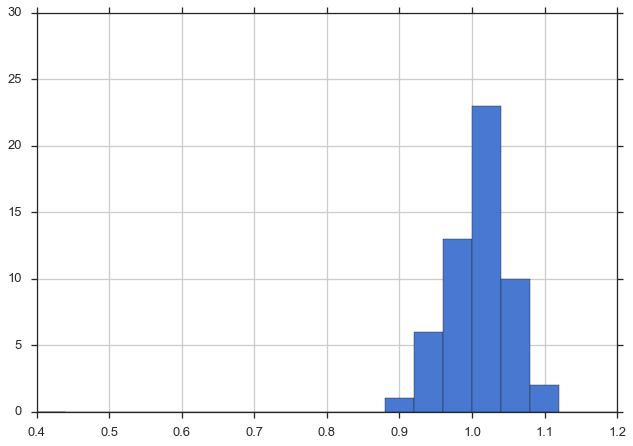

In [157]:
res_df['slope_P'][res_df['Task']==1].hist(bins=20, range=[0.4,1.2])
plt.ylim([0,30])

## Histogram slope subject estimates Task -

(0, 30)

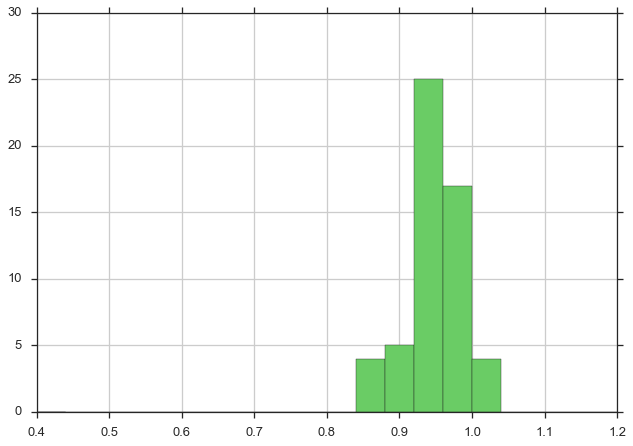

In [158]:
res_df['slope_P'][res_df['Task']==2].hist(bins=20, range=[0.4,1.2],color=pal[1])
plt.ylim([0,30])

## Histogram slope subject estimates Task w

(0, 30)

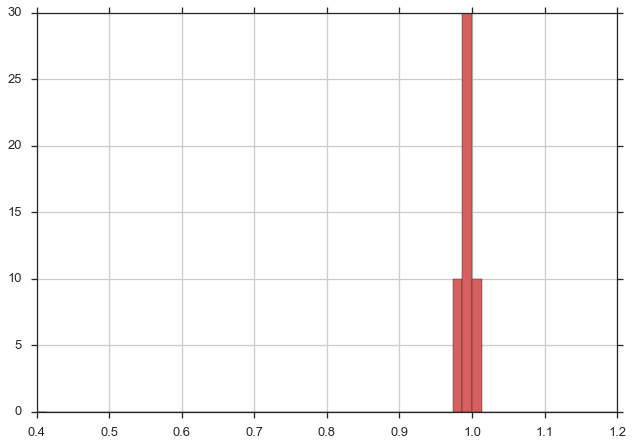

In [159]:
res_df['slope_P'][res_df['Task']==3].hist(bins=60, range=[0.4,1.2],color=pal[2])
plt.ylim([0,30])

In [160]:
math = pd.read_csv('Math_Results_Combined.csv')

In [161]:
res_df = pd.merge(res_df,math,on='Subject',how='inner')

##  Deviation from Linearity Vs. Math Score

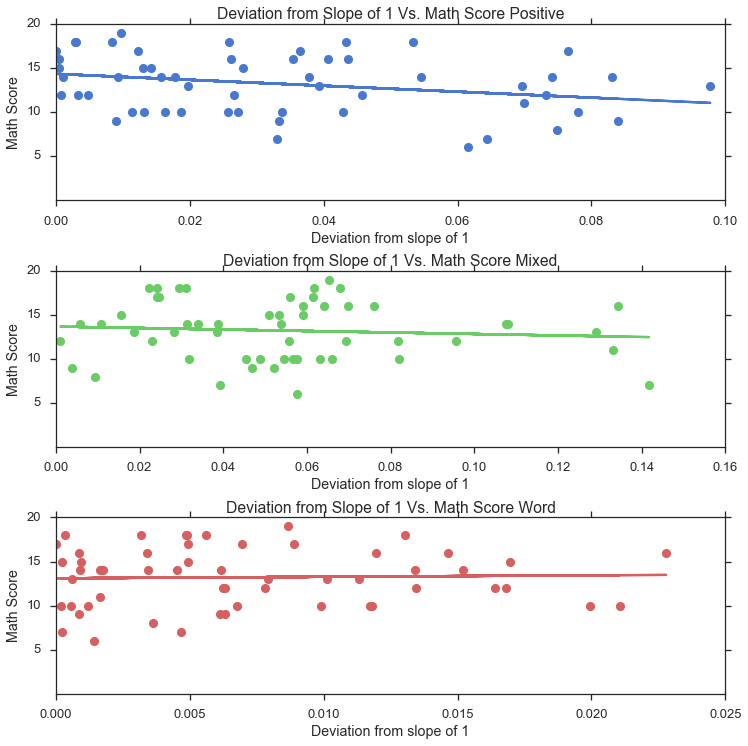

In [162]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==1] -1),
                    res_df['Math_Score'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(abs(res_df['slope_P'][res_df['Task']==1] -1),
          res_df['Math_Score'][res_df['Task']==1], 'o', color=pal[0])
plt.plot(abs(res_df['slope_P'][res_df['Task']==1] -1), 
         m1*abs(res_df['slope_P'][res_df['Task']==1] -1) + b1, '-', color=pal[0])
plt.title('Deviation from Slope of 1 Vs. Math Score Positive')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==2] -1),
                    res_df['Math_Score'][res_df['Task']==2],1)
#fig = plt.figure(figsize=(12,12))
fig2 = plt.subplot(3,1,2)
fig2.plot(abs(res_df['slope_P'][res_df['Task']==2] -1),
          res_df['Math_Score'][res_df['Task']==2], 'o', color=pal[1])
plt.plot(abs(res_df['slope_P'][res_df['Task']==2] -1), 
         m2*abs(res_df['slope_P'][res_df['Task']==2] -1) + b2, '-', color=pal[1])
plt.title('Deviation from Slope of 1 Vs. Math Score Mixed')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

#handle nan
idx = np.isfinite(abs(res_df['slope_P'][res_df['Task']==3] -1)) & np.isfinite(res_df['Math_Score'][res_df['Task']==3])
m3, b3 = np.polyfit(abs(res_df['slope_P'][res_df['Task']==3][idx] -1),
                    res_df['Math_Score'][res_df['Task']==3][idx],1)
#fig = plt.figure(figsize=(12,12))
fig3 = plt.subplot(3,1,3)
fig3.plot(abs(res_df['slope_P'][res_df['Task']==3] -1),
          res_df['Math_Score'][res_df['Task']==3], 'o', color=pal[2])
plt.plot(abs(res_df['slope_P'][res_df['Task']==3] -1), 
         m3*abs(res_df['slope_P'][res_df['Task']==3] -1) + b3, '-', color=pal[2])
plt.title('Deviation from Slope of 1 Vs. Math Score Word')
plt.xlabel('Deviation from slope of 1', labelpad = 4)
plt.ylabel('Math Score')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.subplots_adjust(hspace=.4)

This results was not replicated during our behavioral replication with another 40 subjects

In [163]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [164]:
slope1, intercept1, r1, p1, stderr1 = linregress(abs(res_df['slope_P'][res_df['Task']==1]-1),
                                                 res_df['Math_Score'][res_df['Task']==1])
slope2, intercept2, r2, p2, stderr2 = linregress(abs(res_df['slope_P'][res_df['Task']==2]-1),
                                                 res_df['Math_Score'][res_df['Task']==2])
slope3, intercept3, r3, p3, stderr3 = linregress(abs(res_df['slope_P'][res_df['Task']==3]-1),
                                                 res_df['Math_Score'][res_df['Task']==3])

### r +, r -, r w

In [165]:
print r1, r2, r3

-0.270394453633 -0.0844217841529 0.0304956964979


### R^2 +, R^2 -, R^2 w

In [166]:
print r1*r1, r2*r2, r3*r3

0.0731131605552 0.00712703763956 0.00092998750489


### p-value +, p-value -, p-value w

In [167]:
print p1, p2, p3

0.045868424076 0.540006150376 0.82507779104


## Slope Vs Intercept

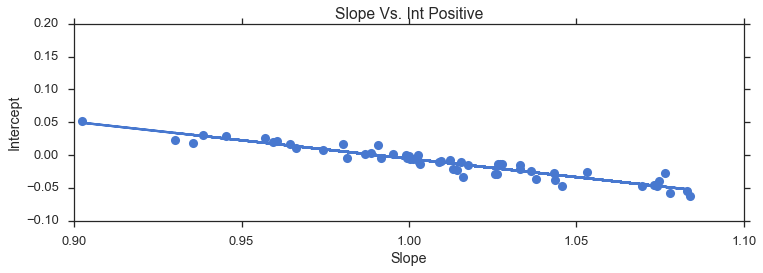

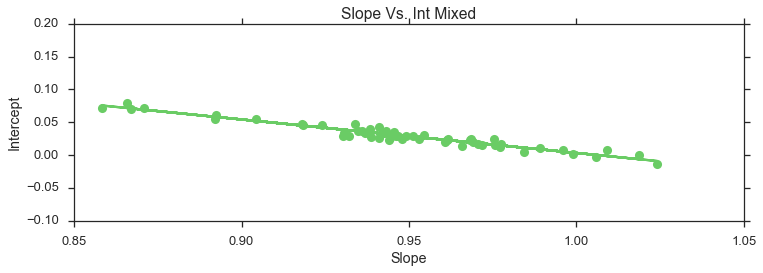

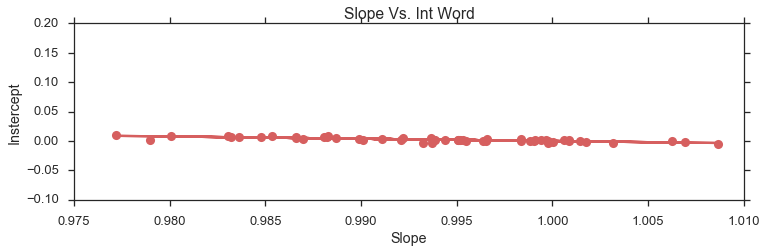

In [168]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(res_df['slope_P'][res_df['Task']==1],
                    res_df['int_P'][res_df['Task']==1],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(res_df['slope_P'][res_df['Task']==1],
          res_df['int_P'][res_df['Task']==1], 'o', color=pal[0])
plt.plot(res_df['slope_P'][res_df['Task']==1], 
         m1*res_df['slope_P'][res_df['Task']==1] + b1, '-', color=pal[0])
plt.title('Slope Vs. Int Positive')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Intercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))

m2, b2 = np.polyfit(res_df['slope_P'][res_df['Task']==2],
                    res_df['int_P'][res_df['Task']==2],1)
fig = plt.figure(figsize=(12,12))
fig2 = plt.subplot(3,1,2)
fig2.plot(res_df['slope_P'][res_df['Task']==2],
          res_df['int_P'][res_df['Task']==2], 'o', color=pal[1])
plt.plot(res_df['slope_P'][res_df['Task']==2], 
         m2*res_df['slope_P'][res_df['Task']==2] + b2, '-', color=pal[1])
plt.title('Slope Vs. Int Mixed')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Intercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))


m3, b3 = np.polyfit(res_df['slope_P'][res_df['Task']==3],
                    res_df['int_P'][res_df['Task']==3],1)
fig = plt.figure(figsize=(12,12))
fig3 = plt.subplot(3,1,3)
fig3.plot(res_df['slope_P'][res_df['Task']==3],
          res_df['int_P'][res_df['Task']==3], 'o', color=pal[2])
plt.plot(res_df['slope_P'][res_df['Task']==3], 
         m3*res_df['slope_P'][res_df['Task']==3] + b3, '-', color=pal[2])
plt.title('Slope Vs. Int Word')
plt.xlabel('Slope', labelpad = 4)
plt.ylabel('Instercept')
plt.ylim([-0.1,0.2])
plt.yticks(([-0.1,-0.05,0,.05,.1,.15,0.2]))
plt.subplots_adjust(hspace=.4)

In [169]:
res_df.Subject.unique()

array(['s_04203', 's_04202', 's_04207', 's_04206', 's_04205', 's_04204',
       's_02003', 's_02007', 's_02006', 's_02005', 's_02004', 's_04119',
       's_04118', 's_04113', 's_04112', 's_04111', 's_04110', 's_04115',
       's_04114', 's_04220', 's_04211', 's_04218', 's_04201', 's_04210',
       's_04219', 's_04209', 's_02018', 's_02019', 's_04120', 's_04213',
       's_04212', 's_04215', 's_04216', 's_04217', 's_02010', 's_02011',
       's_02012', 's_02014', 's_02015', 's_02016', 's_02017', 's_04108',
       's_04109', 's_04101', 's_04102', 's_04103', 's_04105', 's_04106',
       's_04107', 's_02024', 's_02027', 's_04214', 's_02021', 's_02023',
       's_02022'], dtype=object)

## Scatter plots for individual subjects

In [170]:
new_math_df = pd.merge(new_df,math,on='Subject',how='inner')

In [171]:
ordered = res_df[['Subject', 'Math_Score']][res_df['Task']==1]
ordered_math = ordered.sort_values(by='Math_Score', ascending=False)

In [172]:
table_order = ordered_math.Subject

# Positive Task

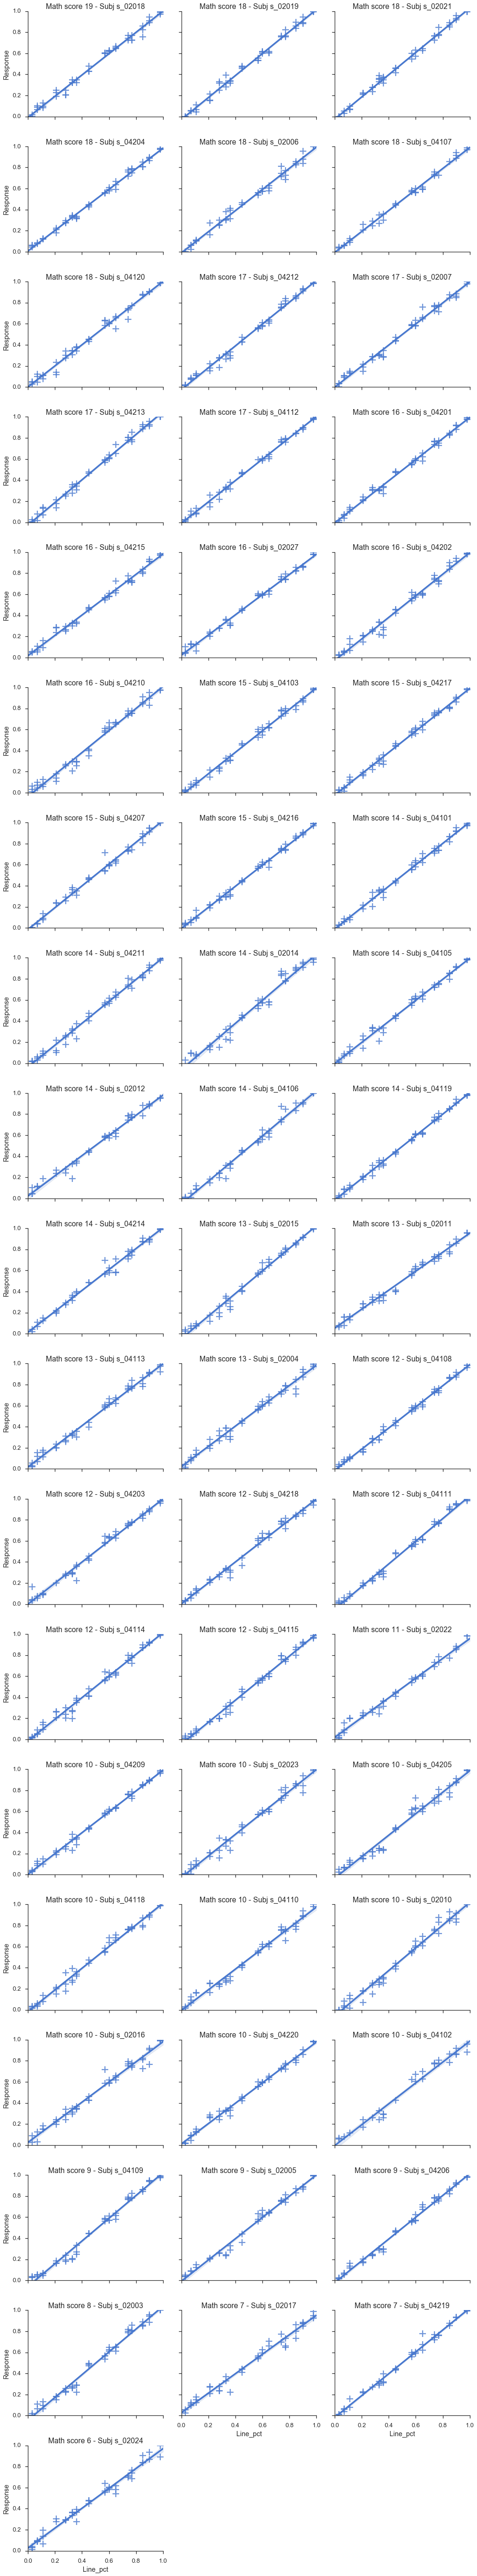

In [173]:
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_df[new_math_df['Task']==1],markers=['+'],
               col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200, 'color':pal[0]},
              line_kws={'color':pal[0]})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1
g.savefig('Scatter_Positive.png')

# Mixed Task

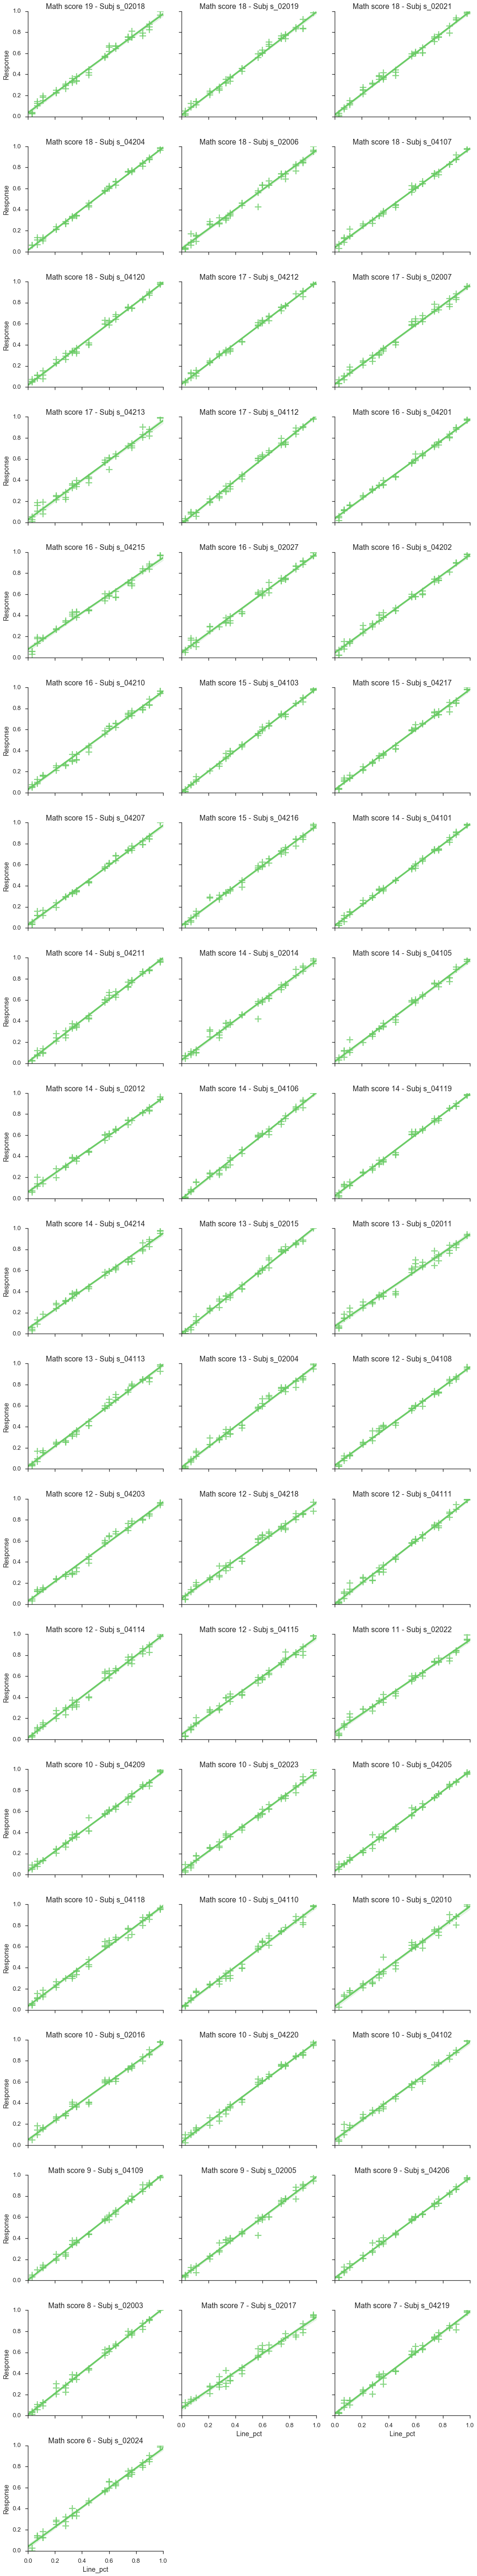

In [174]:
g = sns.lmplot(x='Line_pct', y='Response', col='Subject',col_wrap=3,
           data=new_math_df[new_math_df['Task']==2],
               markers=['+'],col_order=ordered_math['Subject'],
               size=4,aspect=1.2,scatter_kws={'s':200,'color':pal[1]},
              line_kws={'color':pal[1]})
g = (g.set(xlim=(0,1),ylim=(0,1)))
ctr = 0
for ax in g.axes.flat:
    ax.set_title('Math score %d - Subj %s' % (ordered_math.iloc[ctr]['Math_Score'], ordered_math.iloc[ctr]['Subject']))
    ctr = ctr + 1
g.savefig('Scatter_Negative.png')

## Make Result Table

In [175]:
group_task_t = new_df.groupby(['Subject', 'Task'])

In [176]:
np.sort(new_df['Subject'].unique())

array(['s_02003', 's_02004', 's_02005', 's_02006', 's_02007', 's_02010',
       's_02011', 's_02012', 's_02014', 's_02015', 's_02016', 's_02017',
       's_02018', 's_02019', 's_02021', 's_02022', 's_02023', 's_02024',
       's_02027', 's_04101', 's_04102', 's_04103', 's_04105', 's_04106',
       's_04107', 's_04108', 's_04109', 's_04110', 's_04111', 's_04112',
       's_04113', 's_04114', 's_04115', 's_04118', 's_04119', 's_04120',
       's_04201', 's_04202', 's_04203', 's_04204', 's_04205', 's_04206',
       's_04207', 's_04209', 's_04210', 's_04211', 's_04212', 's_04213',
       's_04214', 's_04215', 's_04216', 's_04217', 's_04218', 's_04219',
       's_04220'], dtype=object)

In [177]:
len(new_df)

7410

In [178]:
results_df = pd.DataFrame(new_df[new_df['Task']==1].groupby('Subject')['RT'].median())
results_df.columns = ['RT+']
results_df['RT-'] = new_df[new_df['Task']==2].groupby('Subject')['RT'].median()
results_df['RTw'] = new_df[new_df['Task']==3].groupby('Subject')['RT'].median()

In [179]:
#results_df['E+'] = new_df[new_df['Task']==1].groupby('Subject')['BigError'].sum()
#results_df['E-'] = new_df[new_df['Task']==2].groupby('Subject')['BigError'].sum()
#results_df['Ew'] = new_df[new_df['Task']==3].groupby('Subject')['BigError'].sum()

In [180]:
sds = []
for sub in np.sort(new_df['Subject'].unique()):
    grouped = new_df.loc[new_df['Subject']==sub].groupby(['Task', 'Line_pct'])
    for pos in grouped.groups.keys():
        task = pos[0]
        stim = pos[1]
        tmp = grouped.get_group((task,stim))['Error']
        tmp = np.nanstd(tmp)
        sds.append({'Subject':sub, 'Task':task, 'Line_pct':stim,
             'SD':tmp})
SD_df = pd.DataFrame(sds)
results_df['SD+'] = SD_df[SD_df['Task']==1].groupby('Subject')['SD'].mean()
results_df['SD-'] = SD_df[SD_df['Task']==2].groupby('Subject')['SD'].mean()
results_df['SDw'] = SD_df[SD_df['Task']==3].groupby('Subject')['SD'].mean()

In [181]:
group_task = new_df.groupby(['Subject','Task','Line_pct'])

In [182]:
error = group_task['AbsError'].mean()
response = group_task['Response'].mean()

In [183]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0
error_dict = {}
position_dict = {}
results_list = []
for s in np.sort(new_df['Subject'].unique()):
    error_dict[s] = {}
    position_dict[s] = {}
    for t in tasks:
        d_tmp = {}
        error_dict[s][t] = error.loc[s].loc[t]
        position_dict[s][t] = response.loc[s].loc[t]
        slope,inter,r,p,stderr = linregress(error_dict[s][t].index, error_dict[s][t])
        slope2,inter2,r2,p2,stderr2 = linregress(position_dict[s][t].index, position_dict[s][t])
        d_tmp = {'Subject':s, 'Task':t, 'slope_E':slope, 'slope_P':slope2, 'int_E':inter,
                 'int_P':inter2,'r_E':r, 'r_P':r2, 'p_E':p, 'p_P':p2, 'stderr_E':stderr,
                 'stderr_P':stderr2, 'R2_E':r*r, 'R2_P':r2*r2}
        results_list.append(d_tmp)
res_df = pd.DataFrame(results_list)      

In [184]:
r2_1 = res_df[['Subject','R2_P']][res_df['Task']==1]
r2_1.columns = ['Subject', 'R^2+']
results_df = results_df.join(r2_1.groupby('Subject').mean(), how='inner')

In [185]:
r2_2 = res_df[['Subject','R2_P']][res_df['Task']==2]
r2_2.columns = ['Subject', 'R^2-']
results_df = results_df.join(r2_2.groupby('Subject').mean(), how='inner')

In [186]:
r2_3 = res_df[['Subject','R2_P']][res_df['Task']==3]
r2_3.columns = ['Subject', 'R^2w']
results_df = results_df.join(r2_3.groupby('Subject').mean(), how='inner')

In [187]:
slope_1 = res_df[['Subject','slope_P']][res_df['Task']==1]
slope_1.columns = ['Subject', 'slope+']
results_df = results_df.join(slope_1.groupby('Subject').mean(), how='inner')
slope_2 = res_df[['Subject','slope_P']][res_df['Task']==2]
slope_2.columns = ['Subject', 'slope-']
results_df = results_df.join(slope_2.groupby('Subject').mean(), how='inner')
slope_3 = res_df[['Subject','slope_P']][res_df['Task']==3]
slope_3.columns = ['Subject', 'slopew']
results_df = results_df.join(slope_3.groupby('Subject').mean(), how='inner')

In [188]:
PAE1 = new_df[new_df['Task']==1].groupby(['Subject', 'Line_pct'])['AbsError'].mean()
PAE2 = new_df[new_df['Task']==2].groupby(['Subject', 'Line_pct'])['AbsError'].mean()
PAE3 = new_df[new_df['Task']==3].groupby(['Subject', 'Line_pct'])['AbsError'].mean()

In [189]:
SD1 = SD_df[SD_df.Task == 1].groupby(['Subject', 'Line_pct'])['SD'].mean()
SD2 = SD_df[SD_df.Task == 2].groupby(['Subject', 'Line_pct'])['SD'].mean()
SD3 = SD_df[SD_df.Task == 3].groupby(['Subject', 'Line_pct'])['SD'].mean()

In [190]:
corrs1 = []
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
for sub in SD1.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,SD1.loc[sub])
    corrs1.append({'Subject':sub, 'SD_Lan_+':r1})
DE1 = pd.DataFrame(corrs1)
results_df = results_df.join(DE1.groupby('Subject').mean(), how='inner')

In [191]:
corrs2 = []
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
for sub in SD2.index.levels[0]:
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,SD2.loc[sub])
    corrs2.append({'Subject':sub, 'SD_Lan_-':r1})
DE2 = pd.DataFrame(corrs2)
results_df = results_df.join(DE2.groupby('Subject').mean(), how='inner')

In [192]:
abs(SD3.loc['s_02017'].keys()-.5)

Float64Index([0.47, 0.43, 0.39, 0.29, 0.22, 0.17, 0.14, 0.05, 0.07,  0.1, 0.15,
              0.24, 0.27, 0.35,  0.4],
             dtype='float64', name=u'Line_pct')

In [193]:
corrs3 = []
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
for sub in SD3.index.levels[0]:
    zero = SD3.loc[sub].keys()
    mid = abs(SD3.loc[sub].keys()-.5)
    end = abs(SD3.loc[sub].keys()-1)
    dist_Land = pd.DataFrame([zero, mid, end]).min()
    slope1, intercept1, r1, p1, stderr1 = linregress(dist_Land,SD3.loc[sub])
    corrs3.append({'Subject':sub, 'SD_Lan_w':r1})
DE3 = pd.DataFrame(corrs3)
results_df = results_df.join(DE3.groupby('Subject').mean(), how='inner')

In [194]:
miss_df = pd.read_csv('nline_data.csv',sep='\t')
miss_df.loc[:,:]= miss_df[miss_df['catch']<1]
#len(nline_miss)
miss_df['Missed'] = miss_df['Error']
miss_df.loc[miss_df['Missed']<1,'Missed'] = 0
miss_df = miss_df[pd.notnull(miss_df['Subject'])]

In [195]:
results_df['Miss+'] = miss_df[miss_df['Task']==1].groupby('Subject')['Missed'].sum()
results_df['Miss-'] = miss_df[miss_df['Task']==2].groupby('Subject')['Missed'].sum()
results_df['Missw'] =miss3 = miss_df[miss_df['Task']==3].groupby('Subject')['Missed'].sum()

In [196]:
math.columns = ['Subject', 'SAT']
results_df = results_df.join(math.groupby('Subject').mean(), how='inner')

Sort columns to make viewing easier

In [197]:
cols = results_df.columns.tolist()
cols = cols[-1:] + cols[-4:-1] + cols[0:-4]
results_df = results_df[cols]

### Mean or median for absolute error? Include or nor big errors? RIght now for ANOVA it is mean and doesnot include big errors

In [198]:
results_df.loc[:,'AbsError+'] = new_df[new_df['Task']==1].groupby('Subject')['AbsError'].mean()
results_df.loc[:,'AbsError-'] = new_df[new_df['Task']==2].groupby('Subject')['AbsError'].mean()
results_df.loc[:,'AbsErrorw'] = new_df[new_df['Task']==3].groupby('Subject')['AbsError'].mean()

In [199]:
results_df.loc[:,'Error+'] = new_df[new_df['Task']==1].groupby('Subject')['Error'].mean()
results_df.loc[:,'Error-'] = new_df[new_df['Task']==2].groupby('Subject')['Error'].mean()
results_df.loc[:,'Errorw'] = new_df[new_df['Task']==3].groupby('Subject')['Error'].mean()

In [200]:
linear_1 = res_df[['Subject','slope_P']][res_df['Task']==1]
linear_1.loc[:,'slope_P'] = abs(linear_1['slope_P'] - 1)
linear_1.columns = ['Subject', 'linearity+']
results_df = results_df.join(linear_1.groupby('Subject').mean(), how='inner')
linear_2 = res_df[['Subject','slope_P']][res_df['Task']==2]
linear_2.loc[:,'slope_P'] = abs(linear_2['slope_P'] - 1)
linear_2.columns = ['Subject', 'linearity-']
results_df = results_df.join(linear_2.groupby('Subject').mean(), how='inner')
linear_3 = res_df[['Subject','slope_P']][res_df['Task']==3]
linear_3.loc[:,'slope_P'] = abs(linear_3['slope_P'] - 1)
linear_3.columns = ['Subject', 'linearityw']
results_df = results_df.join(linear_3.groupby('Subject').mean(), how='inner')

In [201]:
results_df

SAT  Miss+  Miss-  Missw       RT+       RT-       RTw       SD+  \
Subject                                                                     
s_02003    8      1      2      4  2.255009  2.220295  2.362406  0.016652   
s_02004   13      1      0      2  2.062043  2.234014  2.295116  0.024540   
s_02005    9      8      3      6  2.542199  2.390150  2.279069  0.013788   
s_02006   18      1      0      1  1.928688  1.927987  1.976927  0.023140   
s_02007   17      1      0      0  2.175922  2.210661  1.962051  0.018342   
s_02010   10      1      4      2  1.844458  1.726596  1.728810  0.028299   
s_02011   13      2      1      4  2.143631  2.125858  2.218781  0.017647   
s_02012   14      5      3      7  2.413394  2.354387  2.230194  0.017885   
s_02014   14      3      1      3  2.209955  2.168760  2.259560  0.021720   
s_02015   13      2      2      2  2.192351  2.144108  2.119425  0.018287   
s_02016   10      3      2      5  2.075990  2.009483  2.059648  0.028144   
s_02017    7      4      3      3  2.325314  2.285340  2.178642  0.021920   
s_02018   19      1      1      2  2.075674  2.036775  1.753603  0.016927   
s_02019   18      2      4      0  2.234405  2.341482  2.261201  0.017175   
s_02021   18      1      2      2  1.978035  2.094414  2.109527  0.016634   
s_02022   11      9      3      6  2.275808  2.294566  2.274976  0.015125   
s_02023   10      2      1      2  2.212912  2.207078  2.141455  0.027717   
s_02024    6      3      4      3  2.140983  2.379274  2.184819  0.025252   
s_02027   16      3      3      0  2.230180  2.092672  2.091337  0.011938   
s_04101   14    NaN    NaN    NaN  2.182131  2.090335  2.098808  0.019737   
s_04102   10    NaN    NaN    NaN  2.174229  1.967248  2.001604  0.018284   
s_04103   15    NaN    NaN    NaN  2.360358  2.211719  2.110843  0.018327   
s_04105   14    NaN    NaN    NaN  2.293861  2.185315  2.043991  0.018708   
s_04106   14    NaN    NaN    NaN  2.299130  2.382604  2.249001  0.021326   
s_04107   18    NaN    NaN    NaN  2.143866  2.451542  2.253408  0.014091   
s_04108   12    NaN    NaN    NaN  2.060442  1.893932  1.755378  0.012856   
s_04109    9    NaN    NaN    NaN  2.061829  1.994606  1.760767  0.012545   
s_04110   10    NaN    NaN    NaN  2.148934  2.215671  1.890057  0.017564   
s_04111   12    NaN    NaN    NaN  1.990092  2.071066  2.109848  0.010547   
s_04112   17    NaN    NaN    NaN  2.231767  2.081958  2.015296  0.014851   
s_04113   13    NaN    NaN    NaN  2.152178  2.144395  1.995360  0.022245   
s_04114   12    NaN    NaN    NaN  2.061358  2.160503  2.160579  0.021447   
s_04115   12    NaN    NaN    NaN  1.647933  1.564415  1.681391  0.015804   
s_04118   10    NaN    NaN    NaN  2.056987  2.073794  1.998579  0.021681   
s_04119   14    NaN    NaN    NaN  2.227474  2.124567  2.143710  0.014330   
s_04120   18    NaN    NaN    NaN  1.993821  2.002274  1.960454  0.019477   
s_04201   16    NaN    NaN    NaN  2.136691  2.194606  1.945590  0.013284   
s_04202   16    NaN    NaN    NaN  2.031967  1.948590  1.881664  0.019469   
s_04203   12    NaN    NaN    NaN  2.277177  2.242380  1.960632  0.017563   
s_04204   18    NaN    NaN    NaN  2.081931  1.948395  2.240723  0.012239   
s_04205   10    NaN    NaN    NaN  1.748040  1.731305  1.581106  0.019497   
s_04206    9    NaN    NaN    NaN  2.128244  2.269339  1.876798  0.011525   
s_04207   15    NaN    NaN    NaN  2.360377  2.378409  2.160416  0.017003   
s_04209   10    NaN    NaN    NaN  2.060481  2.028474  1.977331  0.014974   
s_04210   16    NaN    NaN    NaN  2.015186  1.956788  2.015441  0.021627   
s_04211   14    NaN    NaN    NaN  1.933033  1.968608  2.055364  0.024816   
s_04212   17    NaN    NaN    NaN  2.274129  2.248989  1.881691  0.015652   
s_04213   17    NaN    NaN    NaN  2.252197  2.218325  2.027224  0.021047   
s_04214   14    NaN    NaN    NaN  2.439360  2.352108  2.260751  0.019547   
s_04215   16    NaN    NaN    NaN  2.260549  2.225938  2.244366  0.016516   
s_042

In [202]:
results_df.to_excel('Results Table.xlsx', index_label='Subject', merge_cells=False)

# Task contrasts for main variables

In [203]:
from scipy.stats import ttest_rel
import pyvttbl as pt

In [204]:
aov_df = pt.DataFrame()

In [205]:
conditions = {'RT': ['RT+', 'RT-', 'RTw'],'AbsError':['AbsError+', 'AbsError-', 'AbsErrorw'],
              'Error':['Error+', 'Error-', 'Errorw'],'SD':['SD+', 'SD-', 'SDw']}
for index, row in results_df.iterrows():
    for task in range(0,3):
        tmp = {'Sub': index}
        for cond in conditions.keys():
            tmp[cond] = row[conditions[cond][task]]
            cond_name = cond+'_cond'
            tmp[cond_name] = conditions[cond][task]
        aov_df.insert(tmp)

## RT

In [206]:
aov = aov_df.anova('RT', sub='Sub', wfactors=['RT_cond'])
print(aov)

RT ~ RT_cond

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: RT
    Source                            Type III    eps      df      MS       F        Sig.      et2_G   Obs.    SE     95% CI   lambda   Obs.  
                                         SS                                                                                             Power 
RT_cond          Sphericity Assumed      0.265       -        2   0.132   15.281   1.433e-06   0.053     55   0.013    0.025   15.564   0.946 
                 Greenhouse-Geisser      0.265   0.790    1.580   0.167   15.281   1.261e-05   0.053     55   0.013    0.025   15.564   0.901 
                 Huynh-Feldt             0.265   0.790    1.580   0.167   15.281   1.261e-05   0.053     55   0.013    0.025   15.564   0.901 
                 Box                     0.265   0.500        1   0.265   15.281   2.606e-04   0.053     55   0.013    0.025   15.564   0.782 
----------------------------------------------------------------------------------

//anaconda/lib/python2.7/site-packages/pyvttbl/stats/_anova.py:1240: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return list(array(list(zeros((p-len(b))))+b)+1.)


In [207]:
ttest_rel(results_df['RT+'], results_df['RT-'])

Ttest_relResult(statistic=0.7395610281318844, pvalue=0.46276943354704392)

In [208]:
ttest_rel(results_df['RT+'], results_df['RTw'])

Ttest_relResult(statistic=4.5604620192167742, pvalue=2.9718772343284806e-05)

In [209]:
ttest_rel(results_df['RT-'], results_df['RTw'])

Ttest_relResult(statistic=4.1695947325158444, pvalue=0.00011120065014510972)

No differences between tasks in the fMRI task but signicant differences between bnumber tasks and wiord task in the behavioral replication

In [210]:
results_df[['RT+','RT-','RTw','AbsError+','AbsError-','AbsErrorw','Error+',
           'Error-','Errorw','SD+','SD-','SDw']].std()

RT+          0.165611
RT-          0.184392
RTw          0.175123
AbsError+    0.006648
AbsError-    0.007043
AbsErrorw    0.003109
Error+       0.008020
Error-       0.005089
Errorw       0.002102
SD+          0.004197
SD-          0.003409
SDw          0.002812
dtype: float64

## MAE

In [211]:
aov = aov_df.anova('AbsError', sub='Sub', wfactors=['AbsError_cond'])
print(aov)

AbsError ~ AbsError_cond

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: AbsError
       Source                               Type III    eps      df        MS          F        Sig.      et2_G   Obs.      SE       95% CI   lambda    Obs.  
                                               SS                                                                                                       Power 
AbsError_cond          Sphericity Assumed      0.014       -        2       0.007   302.371   5.579e-45   2.583     55   6.662e-04    0.001   307.970       1 
                       Greenhouse-Geisser      0.014   0.608    1.216       0.012   302.371   2.254e-28   2.583     55   6.662e-04    0.001   307.970       1 
                       Huynh-Feldt             0.014   0.608    1.216       0.012   302.371   2.254e-28   2.583     55   6.662e-04    0.001   307.970       1 
                       Box                     0.014   0.500        1       0.014   302.371   8.736e-24   2.583     55   6.662e

In [212]:
ttest_rel(results_df['AbsError+'], results_df['AbsError-'])

Ttest_relResult(statistic=1.6397679242820478, pvalue=0.10686685870891925)

In [213]:
ttest_rel(results_df['AbsError+'], results_df['AbsErrorw'])

Ttest_relResult(statistic=25.692751963469028, pvalue=5.9295931387825254e-32)

In [214]:
ttest_rel(results_df['AbsError-'], results_df['AbsErrorw'])

Ttest_relResult(statistic=20.619263485815445, pvalue=2.8874871127188442e-27)

Significant differences between both number tasks and the word task in fMRI task and behavioral replication

## Variability

In [215]:
aov = aov_df.anova('SD', sub='Sub', wfactors=['SD_cond'])
print(aov)

SD ~ SD_cond

TESTS OF WITHIN SUBJECTS EFFECTS

Measure: SD
    Source                            Type III     eps      df        MS          F        Sig.      et2_G   Obs.      SE        95% CI     lambda    Obs.  
                                         SS                                                                                                           Power 
SD_cond          Sphericity Assumed       0.004       -        2       0.002   267.886   1.359e-42   2.155     55   3.873e-04   7.591e-04   272.846       1 
                 Greenhouse-Geisser       0.004   0.594    1.188       0.004   267.886   2.398e-26   2.155     55   3.873e-04   7.591e-04   272.846       1 
                 Huynh-Feldt              0.004   0.594    1.188       0.004   267.886   2.398e-26   2.155     55   3.873e-04   7.591e-04   272.846       1 
                 Box                      0.004   0.500        1       0.004   267.886   1.376e-22   2.155     55   3.873e-04   7.591e-04   272.846       1

In [216]:
ttest_rel(results_df['SD+'], results_df['SD-'])

Ttest_relResult(statistic=5.5145548771193056, pvalue=1.0104640436570985e-06)

In [217]:
ttest_rel(results_df['SD+'], results_df['SDw'])

Ttest_relResult(statistic=21.462273166910084, pvalue=4.180057621822834e-28)

In [218]:
ttest_rel(results_df['SD-'], results_df['SDw'])

Ttest_relResult(statistic=18.662331503731757, pvalue=3.2818986904351898e-25)

Significant differences between all tasks in both fMRI task and behavioral replication. Importantly, we find a significant difference between positive and mixed task in variability with estimates being overall more precise for the Mixed task

# Accuracy Vs Math relations

## PAE Vs Math score

([<matplotlib.axis.YTick at 0x12733f450>,
 <a list of 4 Text yticklabel objects>)

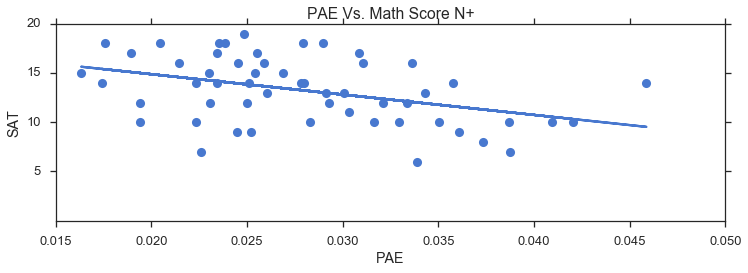

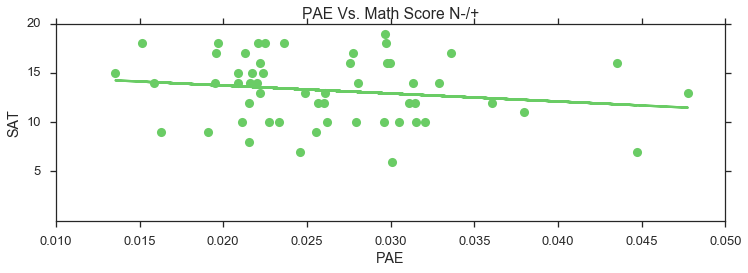

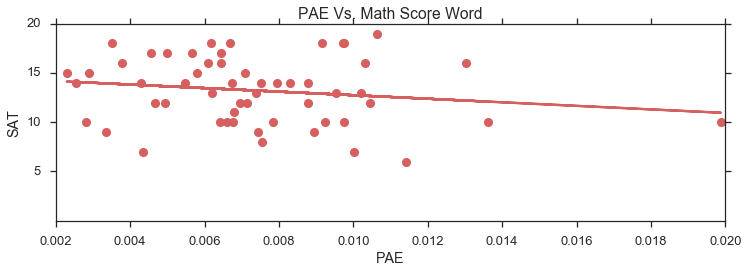

In [219]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(results_df['AbsError+'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsError+'],
          results_df['SAT'], 'o', color=pal[0])
plt.plot(results_df['AbsError+'], 
         m1*results_df['AbsError+'] + b1, '-', color=pal[0])
plt.title('PAE Vs. Math Score N+')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m2, b2 = np.polyfit(results_df['AbsError-'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsError-'],
          results_df['SAT'], 'o', color=pal[1])
plt.plot(results_df['AbsError-'], 
         m2*results_df['AbsError-'] + b2, '-', color=pal[1])
plt.title('PAE Vs. Math Score N-/+')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

m3, b3 = np.polyfit(results_df['AbsErrorw'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['AbsErrorw'],
          results_df['SAT'], 'o', color=pal[2])
plt.plot(results_df['AbsErrorw'], 
         m3*results_df['AbsErrorw'] + b3, '-', color=pal[2])
plt.title('PAE Vs. Math Score Word')
plt.xlabel('PAE', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))

In [220]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [221]:
slope1, intercept1, r1, p1, stderr1 = linregress(results_df['AbsError+'],results_df['SAT'])
slope2, intercept2, r2, p2, stderr2 = linregress(results_df['AbsError-'],results_df['SAT'])
slope3, intercept3, r3, p3, stderr3 = linregress(results_df['AbsErrorw'],results_df['SAT'])

### r +, r -, r w

In [222]:
print r1, r2, r3

-0.411707245379 -0.1709533774 -0.167906620654


### R^2 +, R^2 -, R^2 w

In [223]:
print r1*r1, r2*r2, r3*r3

0.169502855897 0.0292250572446 0.0281926332596


### p-value +, p-value -, p-value w

In [224]:
print p1, p2, p3

0.00179055153246 0.212062514353 0.220443755071


## SD error Vs. MAth Score

(0, 0.04)

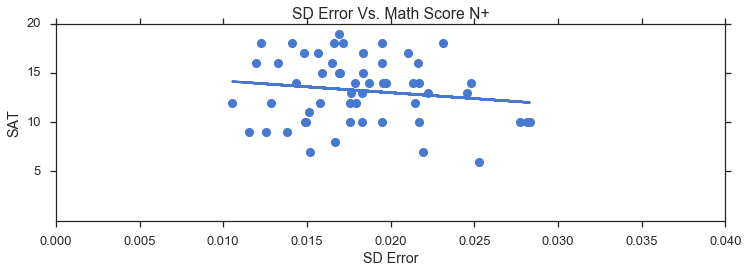

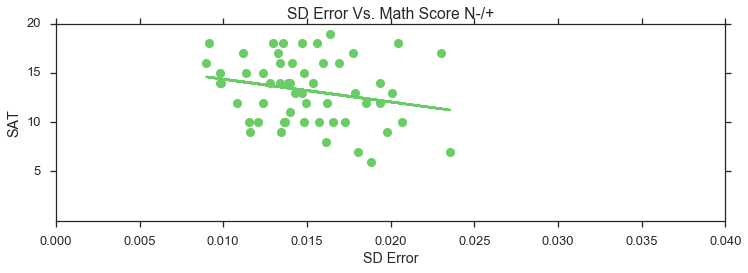

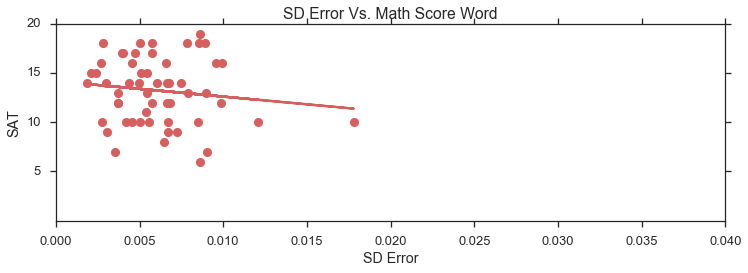

In [225]:
m1 = 0
m2 = 0
m3 = 0
b1 = 0
b2 = 0
b3 = 0

m1, b1 = np.polyfit(results_df['SD+'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['SD+'],
          results_df['SAT'], 'o', color=pal[0])
plt.plot(results_df['SD+'], 
         m1*results_df['SD+'] + b1, '-', color=pal[0])
plt.title('SD Error Vs. Math Score N+')
plt.xlabel('SD Error', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.xlim([0,0.04])

m2, b2 = np.polyfit(results_df['SD-'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['SD-'],
          results_df['SAT'], 'o', color=pal[1])
plt.plot(results_df['SD-'], 
         m2*results_df['SD-'] + b2, '-', color=pal[1])
plt.title('SD Error Vs. Math Score N-/+')
plt.xlabel('SD Error', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.xlim([0,0.04])

m3, b3 = np.polyfit(results_df['SDw'],
                    results_df['SAT'],1)
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(results_df['SDw'],
          results_df['SAT'], 'o', color=pal[2])
plt.plot(results_df['SDw'], 
         m3*results_df['SDw'] + b3, '-', color=pal[2])
plt.title('SD Error Vs. Math Score Word')
plt.xlabel('SD Error', labelpad = 4)
plt.ylabel('SAT')
plt.ylim([0,20])
plt.yticks(([5,10,15,20]))
plt.xlim([0,0.04])

In [226]:
slope1, intercept1, r1, p1, stderr1 = 0,0,0,0,0
slope2, intercept2, r2, p2, stderr2 = 0,0,0,0,0
slope3, intercept3, r3, p3, stderr3 = 0,0,0,0,0

In [227]:
slope1, intercept1, r1, p1, stderr1 = linregress(results_df['SD+'],results_df['SAT'])
slope2, intercept2, r2, p2, stderr2 = linregress(results_df['SD-'],results_df['SAT'])
slope3, intercept3, r3, p3, stderr3 = linregress(results_df['SDw'],results_df['SAT'])

In [228]:
print r1, r2, r3

-0.150643694371 -0.236159518731 -0.132240974885


In [229]:
print p1, p2, p3

0.272282202213 0.0825949183868 0.33583130268


In [230]:
np.corrcoef(results_df['slope-'], results_df['slope+'])

array([[ 1.        ,  0.63800393],
       [ 0.63800393,  1.        ]])

In [231]:
responses = position_tasks.Response.mean()

In [232]:
resp1 = responses.iloc[0:16]
resp2 = responses.iloc[16:32]
resp3 = responses.iloc[32:48]
resp1 = resp1.get_values()
resp2 = resp2.get_values()
resp3 = resp3.get_values()

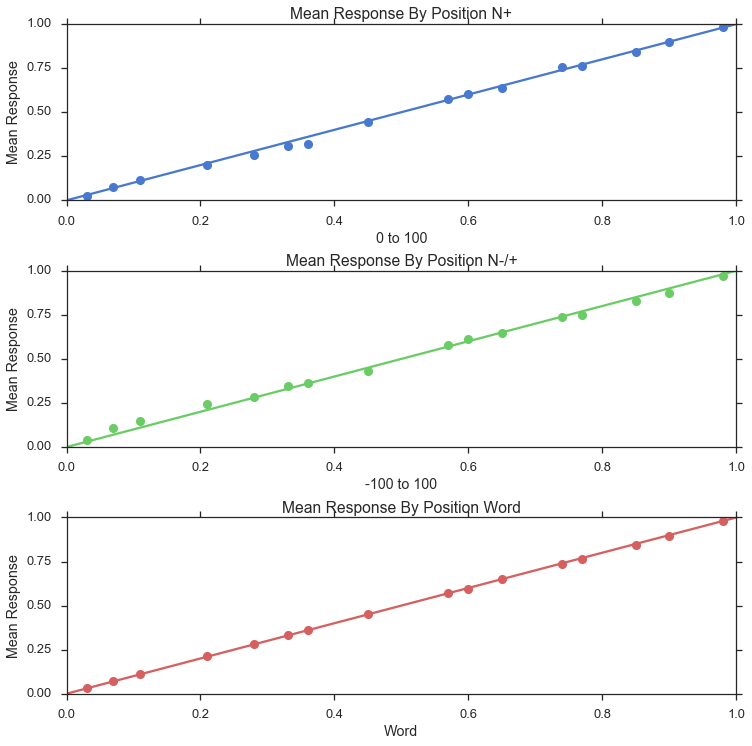

In [233]:
fig = plt.figure(figsize=(12,12))
fig1 = plt.subplot(3,1,1)
fig1.plot(xvals, resp1, 'o', color=pal[0])
fig1.plot([0,1], [0,1], color=pal[0], linestyle='-')
plt.title('Mean Response By Position N+')
plt.xlabel('0 to 100', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([0,.25,.5,.75,1]))

fig2 = plt.subplot(3,1,2)
fig2.plot(xvals, resp2, 'o', color=pal[1])
fig2.plot([0,1], [0,1], color=pal[1], linestyle='-')
plt.title('Mean Response By Position N-/+')
plt.xlabel('-100 to 100', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([0,.25,.5,.75,1]))

fig3 = plt.subplot(3,1,3)
fig3.plot(xvals, resp3, 'o', color=pal[2])
fig3.plot([0,1], [0,1], color=pal[2], linestyle='-')
plt.title('Mean Response By Position Word')
plt.xlabel('Word', labelpad = 4)
plt.ylabel('Mean Response')
plt.ylim([0,1])
plt.yticks(([0,.25,.5,.75,1]))

plt.subplots_adjust(hspace=.4)

In [234]:
results_df.corr()

SAT     Miss+     Miss-     Missw       RT+       RT-  \
SAT         1.000000 -0.370248 -0.404455 -0.509383  0.045441  0.022056   
Miss+      -0.370248  1.000000  0.427912  0.700109  0.699246  0.523573   
Miss-      -0.404455  0.427912  1.000000  0.242127  0.269682  0.209728   
Missw      -0.509383  0.700109  0.242127  1.000000  0.499295  0.339600   
RT+         0.045441  0.699246  0.269682  0.499295  1.000000  0.828951   
RT-         0.022056  0.523573  0.209728  0.339600  0.828951  1.000000   
RTw         0.039869  0.425382  0.101969  0.408023  0.635119  0.693377   
SD+        -0.150644 -0.348611 -0.115999 -0.065242 -0.140086 -0.095120   
SD-        -0.236160 -0.091555 -0.048208 -0.220912 -0.125667 -0.040067   
SDw        -0.132241 -0.300943  0.328580 -0.288516 -0.163891 -0.169456   
R^2+        0.468435 -0.442664 -0.160706 -0.458572 -0.022168  0.042100   
R^2-        0.088997 -0.089934  0.072985 -0.162533  0.035233  0.057059   
R^2w        0.227819  0.081311 -0.398842 -0.015824  0.125343  0.124371   
slope+      0.091929 -0.402267 -0.028051 -0.344704 -0.209786 -0.203793   
slope-      0.090128 -0.475467 -0.051467 -0.405567 -0.061937  0.000942   
slopew      0.088582  0.068386 -0.267707  0.141956  0.152219  0.207031   
SD_Lan_+    0.332966 -0.470811 -0.364192 -0.430220 -0.061408 -0.016231   
SD_Lan_-   -0.237808 -0.413189  0.012503 -0.099197 -0.187176 -0.045652   
SD_Lan_w   -0.284447  0.189492  0.170981  0.194391 -0.005188  0.064432   
AbsError+  -0.411707 -0.078974  0.117302  0.139874 -0.173436 -0.178980   
AbsError-  -0.170953  0.286026  0.025106  0.323562  0.021622 -0.034083   
AbsErrorw  -0.167907 -0.268029  0.364880 -0.200056 -0.141759 -0.136569   
Error+      0.157378 -0.035962 -0.198401  0.171485  0.396003  0.401772   
Error-     -0.131393 -0.010248  0.399592  0.200394 -0.160762 -0.183892   
Errorw      0.132933 -0.021231 -0.206600 -0.079009 -0.094800  0.023899   
linearity+ -0.270394  0.065588  0.386145  0.309762  0.000837  0.066886   
linearity- -0.084422  0.493979  0.054523  0.446967  0.103102  0.007779   
linearityw  0.030496 -0.342555 -0.011668 -0.424028 -0.173130 -0.234973   

                 RTw       SD+       SD-       SDw     ...      SD_Lan_w  \
SAT         0.039869 -0.150644 -0.236160 -0.132241     ...     -0.284447   
Miss+       0.425382 -0.348611 -0.091555 -0.300943     ...      0.189492   
Miss-       0.101969 -0.115999 -0.048208  0.328580     ...      0.170981   
Missw       0.408023 -0.065242 -0.220912 -0.288516     ...      0.194391   
RT+         0.635119 -0.140086 -0.125667 -0.163891     ...     -0.005188   
RT-         0.693377 -0.095120 -0.040067 -0.169456     ...      0.064432   
RTw         1.000000  0.051672  0.100429 -0.070985     ...      0.098573   
SD+         0.051672  1.000000  0.378222  0.341289     ...      0.261407   
SD-         0.100429  0.378222  1.000000  0.365601     ...      0.155940   
SDw        -0.070985  0.341289  0.365601  1.000000     ...      0.112628   
R^2+        0.034249 -0.213410 -0.272395 -0.173638     ...     -0.120631   
R^2-       -0.058617 -0.282687 -0.483351 -0.284162     ...     -0.052099   
R^2w        0.111290 -0.424822 -0.253581 -0.803944     ...     -0.123842   
slope+     -0.220693 -0.006718 -0.008461  0.079781     ...     -0.063662   
slope-     -0.023373 -0.097355 -0.234980 -0.119485     ...     -0.079320   
slopew      0.018482  0.035845  0.030635 -0.256423     ...     -0.156241   
SD_Lan_+   -0.007742  0.055710  0.013678  0.074905     ...      0.013304   
SD_Lan_-   -0.070067 -0.089749  0.151275  0.023028     ...      0.034978   
SD_Lan_w    0.098573  0.261407  0.155940  0.112628     ...      1.000000   
AbsError+  -0.038791  0.490846  0.423420  0.425410     ...      0.059325   
AbsError-   0.088434  0.276045  0.549251  0.284970     ...      0.066747   
AbsErrorw  -0.054356  0.373370  0.355757  0.971808     ...      0.119211   
Error+      0.421335 -0.022818  0.132807 -0.219396     ...     -0.020251   
Error-     -0.040350 -0.039823 -0.131813  0.09

In [235]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

### SD_Lan_+ = correlation between landmark distance and SD of error

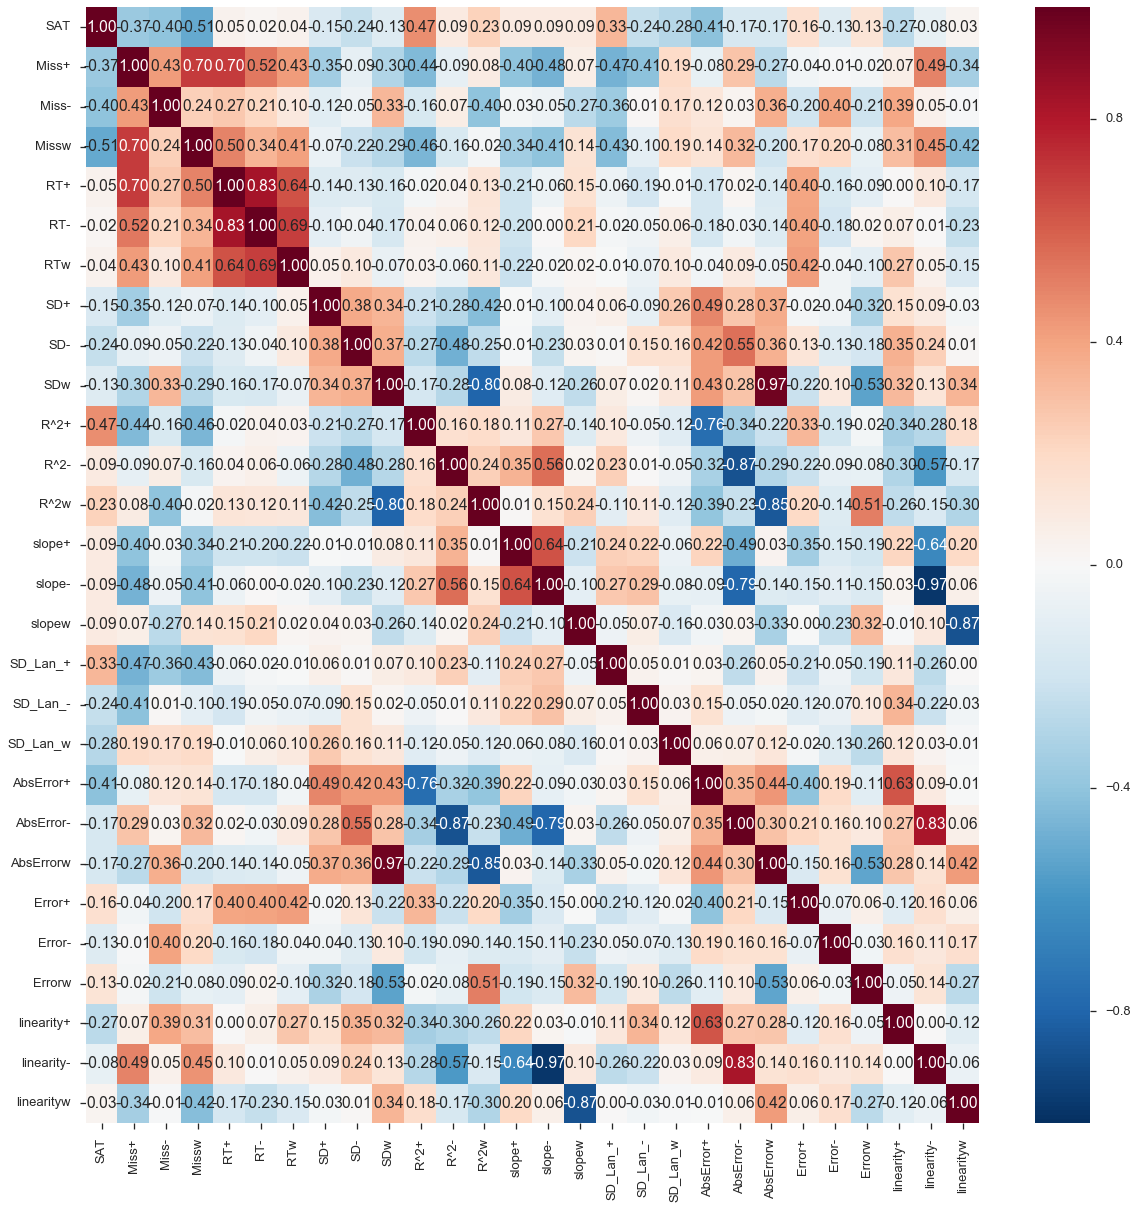

In [236]:
plt.figure(figsize=(20, 20))
sns.heatmap(results_df.corr(), annot=True, fmt='.2f')

## Extreme value analysis of bias

In [237]:
comp_df = new_df.copy()

In [238]:
comp_df.loc[comp_df.Line_pct>0.75,'Error'] = comp_df[comp_df.Line_pct>0.75]['Error'] * -1

In [239]:
grouped_1 = new_df.loc[(new_df.Line_pct<0.25),
                       ['Subject','Task', 'Error']].groupby(['Task','Subject']).mean()

In [240]:
grouped_2 = new_df.loc[new_df.Line_pct>0.75,
                       ['Subject', 'Task', 'Error']].groupby(['Task','Subject']).mean()*-1

In [241]:
combined = comp_df.loc[(comp_df.Line_pct<0.25)|(comp_df.Line_pct>0.75),
                       ['Subject','Task', 'Error']].groupby(['Task','Subject']).mean()

In [242]:
#combined = (grouped_1 + grouped_2)/2

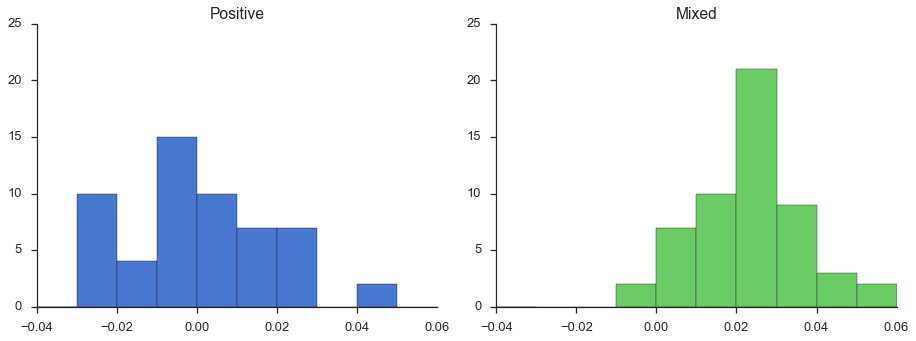

In [243]:
fig = plt.figure(figsize=(13,5))
fig1 = plt.subplot(1,2,1)
fig1.hist(combined.loc[1]['Error'],color=pal[0],bins=10,range=[-0.04,0.06])
plt.ylim([0,25])
plt.xlim([-0.04,0.06])
plt.title('Positive')

fig2 = plt.subplot(1,2,2)
fig2.hist(combined.loc[2]['Error'],color=pal[1],bins=10,range=[-0.04,0.06])
plt.ylim([0,25])
plt.xlim([-0.04,0.06])
plt.title('Mixed')

plt.tight_layout()
plt.subplots_adjust(hspace=.4)
sns.despine()

In [244]:
ttest_rel(combined.loc[1]['Error'], combined.loc[2]['Error'])

Ttest_relResult(statistic=-14.091619314208696, pvalue=9.8635080714243163e-20)

In [245]:
combined.loc[1]['Error'].mean()

0.0007115537139101198

In [246]:
combined.loc[1]['Error'].std()

0.017367843361438085

In [247]:
combined.loc[2]['Error'].mean()

0.02448332892631609

In [248]:
combined.loc[2]['Error'].std()

0.013878600494254243

## Check what happens with order of tasks

In [249]:
run1 = new_df[new_df['Run']=='Run_0']

In [250]:
new_df = new_df.join(new_df.loc[new_df['Task']==1,['Subject','Block']].groupby(['Subject']).mean(),on=['Subject'],rsuffix='_1')

In [251]:
new_df = new_df.join(new_df.loc[new_df['Task']==2,['Subject','Block']].groupby(['Subject']).mean(),on=['Subject'],rsuffix='_2')

In [252]:
new_df['PosFirst'] = new_df['Block_1'] < new_df['Block_2']

In [253]:
pos_df = new_df.loc[new_df.PosFirst==True,:]

In [254]:
mix_df = new_df.loc[new_df.PosFirst==False,:]

In [255]:
grouped_1_Pos_First = pos_df.loc[(pos_df.Line_pct<0.25),
                       ['Subject','Task', 'Error']].groupby(['Task','Subject']).mean()

In [256]:
grouped_2_Pos_First = pos_df.loc[(pos_df.Line_pct>0.75),
                       ['Subject','Task', 'Error']].groupby(['Task','Subject']).mean()

In [257]:
grouped_1_Mix_First = mix_df.loc[(mix_df.Line_pct<0.25),
                       ['Subject','Task', 'Error']].groupby(['Task','Subject']).mean()

In [258]:
grouped_2_Mix_First = mix_df.loc[(mix_df.Line_pct>0.75),
                       ['Subject','Task', 'Error']].groupby(['Task','Subject']).mean()

In [259]:
combined_pos = pd.concat([grouped_1_Pos_First,grouped_2_Pos_First],axis=1)

In [260]:
combined_pos.columns = ['Error1','Error2']

In [261]:
combined_pos['Compression'] = np.nanmean(combined_pos[['Error1','Error2']],axis=1)

In [262]:
combined_mix = pd.concat([grouped_1_Mix_First,grouped_2_Mix_First],axis=1)

In [263]:
combined_mix.columns = [['Error1','Error2']]

In [264]:
combined_mix['Compression'] = np.nanmean(combined_mix[['Error1','Error2']],axis=1)

In [265]:
combined_pos.to_csv('compression_index_pos_Combined.csv')
combined_mix.to_csv('compression_index_mix_Combined.csv')

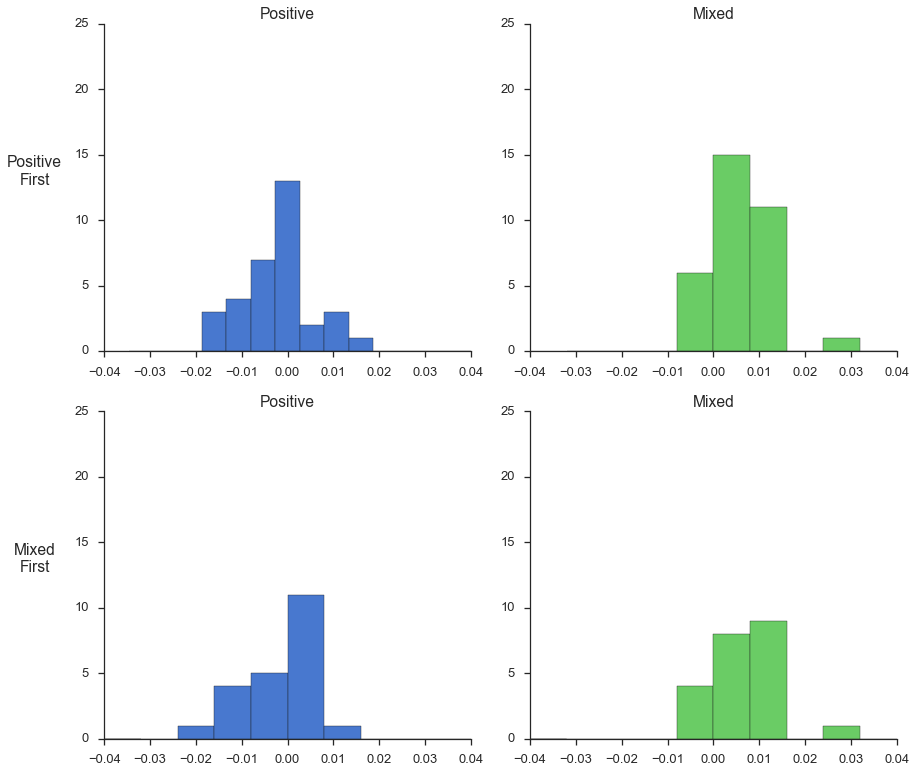

In [266]:
rows = ['Positive\nFirst', 'Mixed\nFirst']

fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(13,11))
    
fig1 = plt.subplot(2,2,1)
fig1.hist(combined_pos.loc[1]['Compression'],color=pal[0],bins=15,range=[-0.04,0.04])
plt.ylim([0,25])
plt.xlim([-0.04,0.04])
plt.title('Positive')
fig1.set_ylabel(rows[0],rotation=0,size='medium',labelpad=40)

fig2 = plt.subplot(2,2,2)
fig2.hist(combined_pos.loc[2]['Compression'],color=pal[1],bins=10,range=[-0.04,0.04])
plt.ylim([0,25])
plt.xlim([-0.04,0.04])
plt.title('Mixed')

fig3 = plt.subplot(2,2,3)
fig3.hist(combined_mix.loc[1]['Compression'],color=pal[0],bins=10,range=[-0.04,0.04])
plt.ylim([0,25])
plt.xlim([-0.04,0.04])
plt.title('Positive')
fig3.set_ylabel(rows[1],rotation=0,size='medium',labelpad=40)

fig4 = plt.subplot(2,2,4)
fig4.hist(combined_mix.loc[2]['Compression'],color=pal[1],bins=10,range=[-0.04,0.04])
plt.ylim([0,25])
plt.xlim([-0.04,0.04])
plt.title('Mixed')

    
fig.tight_layout()
#fig.subplots_adjust(hspace=.4)
sns.despine()

## Across tasks

In [267]:
ttest_rel(combined_pos.loc[1]['Compression'], combined_pos.loc[2]['Compression'])

Ttest_relResult(statistic=-4.0617055234592359, pvalue=0.00029438977711038325)

In [268]:
ttest_rel(combined_mix.loc[1]['Compression'], combined_mix.loc[2]['Compression'])

Ttest_relResult(statistic=-4.5918977297683945, pvalue=0.00015791115620620029)

In [269]:
from scipy.stats import ttest_ind

## Within tasks, between order of presentation

In [270]:
ttest_ind(combined_pos.loc[1]['Compression'],combined_mix.loc[1]['Compression'],equal_var=False)

Ttest_indResult(statistic=-0.36906338132055438, pvalue=0.71373361694028437)

In [271]:
ttest_ind(combined_pos.loc[2]['Compression'],combined_mix.loc[2]['Compression'],equal_var=False)

Ttest_indResult(statistic=-0.9487673916479834, pvalue=0.34799460850240438)

In [272]:
combined_pos.groupby(level=0)['Compression'].mean()

Task
1   -0.001873
2    0.005254
3   -0.000439
Name: Compression, dtype: float64

In [273]:
combined_mix.groupby(level=0)['Compression'].mean()

Task
1   -0.001110
2    0.007054
3   -0.001008
Name: Compression, dtype: float64

## Extract std error of compression estimates

In [274]:
n_comp_trials = comp_df.loc[(comp_df.Line_pct<0.25)|(comp_df.Line_pct>0.75),
                       ['Subject','Task', 'Error']].groupby(['Task','Subject']).count()

In [275]:
std_comp_trials = comp_df.loc[(comp_df.Line_pct<0.25)|(comp_df.Line_pct>0.75),
                       ['Subject','Task', 'Error']].groupby(['Task','Subject']).std()

In [276]:
se_comp_trials = std_comp_trials/np.sqrt(n_comp_trials)

In [277]:
combined['std_error'] = se_comp_trials

In [278]:
combined['CI_Low'] = combined.Error - 1.96*(combined.std_error)

In [279]:
combined['CI_High'] = combined.Error + 1.96*(combined.std_error)

In [280]:
combined['expanded'] = combined.CI_High < 0

In [281]:
combined.loc[1].expanded.sum()

13

In [282]:
combined.loc[2].expanded.sum()

0

In [283]:
combined['compressed'] = combined.CI_Low > 0

In [284]:
combined.loc[1].compressed.sum()

14

In [285]:
combined.loc[2].compressed.sum()

46

In [286]:
combined.loc[1].expanded.count()

55

In [287]:
14/55.0

0.2545454545454545

In [288]:
46/55.0

0.8363636363636363

In [289]:
combined.to_csv('compression_index_Combined.csv')